In [837]:
!pip install DecisionBoundaryDisplay

ERROR: Could not find a version that satisfies the requirement DecisionBoundaryDisplay (from versions: none)
ERROR: No matching distribution found for DecisionBoundaryDisplay


In [739]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os
from sklearn.ensemble import IsolationForest
import warnings

In [740]:
warnings.filterwarnings('ignore')

In [741]:
os.getcwd()

'D:\\jupyter\\01_Sangwoo_Project\\03_Project\\03_GyengnamTP\\03_Collecting_data'

In [742]:
file_list = os.listdir('D:/jupyter/01_Sangwoo_Project/03_Project/03_GyengnamTP/03_Collecting_data')
file_list

['(2022.09.15)preprocessing(making_valid_shot_no).ipynb',
 '(2022.09.16)preprocessing(making_valid_shot_no).ipynb',
 '(2022.09.21)preprocessing(making_valid_shot_no_compete)(R1)_and_build_mo....ipynb',
 '.ipynb_checkpoints',
 '01_Electronic_current',
 '02_Vibration',
 '03_SQL순서(파라미터기준)',
 '04_daehyunkim',
 'Collecting_data.ipynb',
 'Daeshin_parameter_detail_220713_0903_VL04.csv',
 'Daeshin_parameter_detail_220714_0901_VL04.csv',
 'Daeshin_parameter_detail_220714_0903_VL04.csv',
 'Database_data_EDA.ipynb',
 'Database_data_EDA_2(0712~)_prior_MC_ID.ipynb',
 'iForest-tree.png',
 'KakaoTalk_20220824_120214874.png',
 'Multivariate_iForest-tree.png',
 'Tool5_small_data_create.csv',
 'Tool5_small_data_create.ipynb',
 'Tool5_small_data_processing.csv',
 'tree.dot',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'VL04_0710_0721_analysis.ipynb',
 'VL04_0710_0721_analysis_Tool5_kimdaehyun.ipynb',
 'VL04_0710_0721_analysis_Tool9.ipynb',
 'VL04_0713_0903_EDA.ipynb',
 'VL04_data.parquet',
 'VL04_shot_predic

In [743]:
[file_csv for file_csv in file_list if file_csv.endswith('.csv')]

['Daeshin_parameter_detail_220713_0903_VL04.csv',
 'Daeshin_parameter_detail_220714_0901_VL04.csv',
 'Daeshin_parameter_detail_220714_0903_VL04.csv',
 'Tool5_small_data_create.csv',
 'Tool5_small_data_processing.csv']

In [744]:
df = pd.read_csv('Tool5_small_data_create.csv', index_col = 0)
df.head()

datetime  shot_no  current_spindle  current_x  current_z  rpm  \
0  2022-08-03 09:52:44        1             2424          1        157  299   
1  2022-08-03 09:52:44        1             2424          1        157  299   
2  2022-08-03 09:52:44        1             2424          1        157  300   
3  2022-08-03 09:52:44        1             2447          1        161  300   
4  2022-08-03 09:52:45        1             2447          1        161  299   

   load_1  servo_load_x  servo_load_z  servo_current_x  servo_current_z  
0     6.0           3.0          57.0              3.0            -57.0  
1     6.0           3.0          57.0              3.0            -57.0  
2     5.0           4.0          56.0              4.0            -56.0  
3     6.0           4.0          58.0              4.0            -58.0  
4     5.0           4.0          57.0              4.0            -57.0

In [745]:
df

datetime  shot_no  current_spindle  current_x  current_z  \
0       2022-08-03 09:52:44        1             2424          1        157   
1       2022-08-03 09:52:44        1             2424          1        157   
2       2022-08-03 09:52:44        1             2424          1        157   
3       2022-08-03 09:52:44        1             2447          1        161   
4       2022-08-03 09:52:45        1             2447          1        161   
...                     ...      ...              ...        ...        ...   
110767  2022-08-04 19:45:33      258             6022         24         49   
110768  2022-08-04 19:45:33      258             6014          4        -58   
110769  2022-08-04 19:45:33      258             6598         80         70   
110770  2022-08-04 19:45:33      258             6215         32       -103   
110771  2022-08-04 19:45:33      258             6551        -35        -29   

        rpm      load_1  servo_load_x  servo_load_z  servo_current_x  \
0       299    6.000000      3.000000     57.000000         3.000000   
1       299    6.000000      3.000000     57.000000         3.000000   
2       300    5.000000      4.000000     56.000000         4.000000   
3       300    6.000000      4.000000     58.000000         4.000000   
4       299    5.000000      4.000000     57.000000         4.000000   
...     ...         ...           ...           ...              ...   
110767  261  110.500777      3.510579     52.727242        29.134259   
110768  224  143.799246      3.145890     77.799016        30.426937   
110769  147  130.752831      7.538078     28.503181       -28.746190   
110770  138  121.798245     18.829486     84.763451       -17.815957   
110771  -20   -5.063333      1.089754    114.004502        -9.976580   

        servo_current_z  
0            -57.000000  
1            -57.000000  
2            -56.000000  
3            -58.000000  
4            -57.000000  
...                 ...  
110767       -88.599405  
110768       -72.595576  
110769       -65.653969  
110770       -64.613030  
110771       -62.568463  

[332316 rows x 11 columns]

# 해당 데이터 EDA

In [746]:
df[df['shot_no'] == 10].describe()

shot_no  current_spindle    current_x    current_z          rpm  \
count   1048.0      1048.000000  1048.000000  1048.000000  1048.000000   
mean      10.0      2889.924618    13.375000    97.525763   298.609733   
std        0.0       523.171592    14.784851   101.910767    10.993676   
min       10.0      2303.000000     1.000000     1.000000    23.000000   
25%       10.0      2496.000000     1.000000     4.000000   299.000000   
50%       10.0      2650.000000     2.000000   155.000000   299.000000   
75%       10.0      3460.000000    28.000000   159.000000   299.000000   
max       10.0      7482.000000   112.000000  1582.000000   302.000000   

            load_1  servo_load_x  servo_load_z  servo_current_x  \
count  1048.000000   1048.000000   1048.000000      1048.000000   
mean      8.836832      7.681298     57.061069         7.011450   
std       7.477001      4.637536      3.028375         5.608005   
min       1.000000      1.000000     51.000000       -69.000000   
25%       6.000000      4.000000     55.000000         4.000000   
50%       7.000000      5.000000     56.000000         5.000000   
75%      12.000000     12.000000     59.000000        12.000000   
max     122.000000     69.000000     83.000000        15.000000   

       servo_current_z  
count      1048.000000  
mean        -57.061069  
std           3.028375  
min         -83.000000  
25%         -59.000000  
50%         -56.000000  
75%         -55.000000  
max         -51.000000

In [747]:
df[df['shot_no'] == 9].describe()

shot_no  current_spindle    current_x    current_z          rpm  \
count   1039.0      1039.000000  1039.000000  1039.000000  1039.000000   
mean       9.0      2895.452358    13.648701   100.987488   298.586141   
std        0.0       503.883511    16.935864   117.915840    11.415436   
min        9.0      2306.000000     1.000000     1.000000    30.000000   
25%        9.0      2485.000000     1.000000     4.000000   299.000000   
50%        9.0      2710.000000     2.000000   154.000000   299.000000   
75%        9.0      3479.000000    28.000000   158.000000   300.000000   
max        9.0      7757.000000   191.000000  1474.000000   301.000000   

            load_1  servo_load_x  servo_load_z  servo_current_x  \
count  1039.000000   1039.000000   1039.000000      1039.000000   
mean      9.011550      7.599615     57.281039         6.997113   
std       7.627899      4.342007      3.707506         5.254321   
min       1.000000      1.000000     35.000000       -37.000000   
25%       6.000000      4.000000     55.000000         4.000000   
50%       7.000000      5.000000     57.000000         5.000000   
75%      12.000000     12.000000     59.000000        12.000000   
max     122.000000     37.000000    115.000000        14.000000   

       servo_current_z  
count      1039.000000  
mean        -57.279115  
std           3.707912  
min        -115.000000  
25%         -59.000000  
50%         -57.000000  
75%         -55.000000  
max         -35.000000

In [748]:
df.columns

Index(['datetime', 'shot_no', 'current_spindle', 'current_x', 'current_z',
       'rpm', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x',
       'servo_current_z'],
      dtype='object')

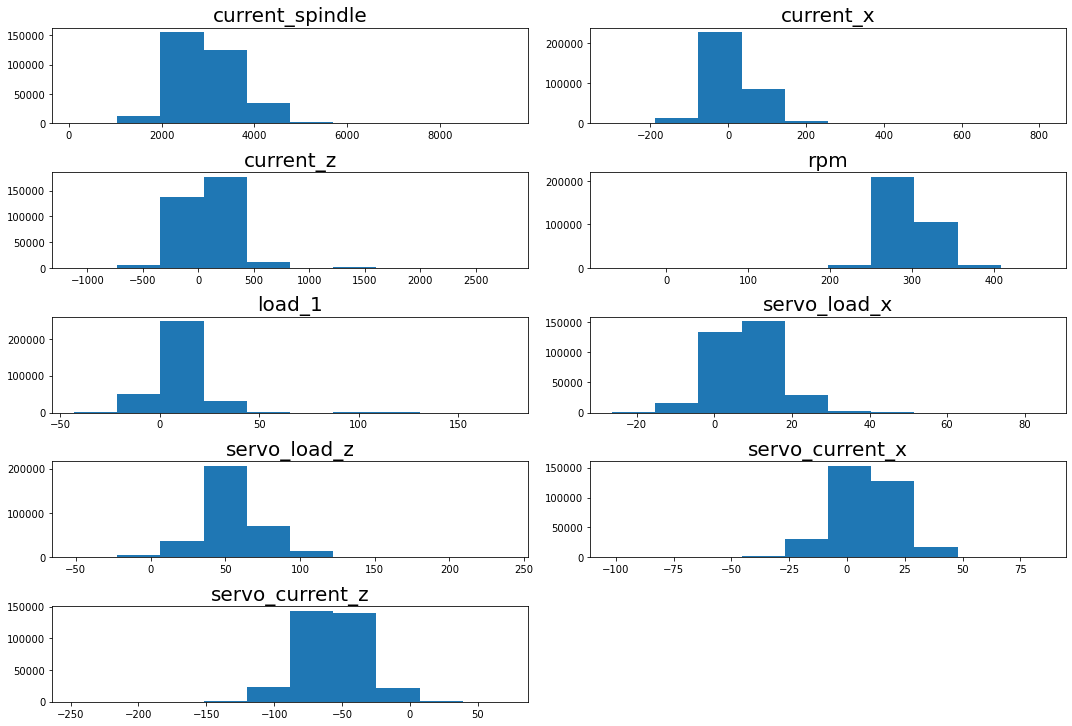

In [749]:
temp_df = df.drop(['datetime', 'shot_no'], axis = 1)
temp_col = temp_df.columns

fig = plt.figure(figsize = (15,20))

# histogram
for idx_hist in range(0, len(temp_col)):
    globals()['ax_{}'.format(idx_hist)] = fig.add_subplot(round(len(temp_col)+1/2),2,(idx_hist+1))
    globals()['ax_{}'.format(idx_hist)].hist(df[temp_col[idx_hist]])
    globals()['ax_{}'.format(idx_hist)].set_title('{}'.format(temp_col[idx_hist]), fontsize = 20)
fig.tight_layout()

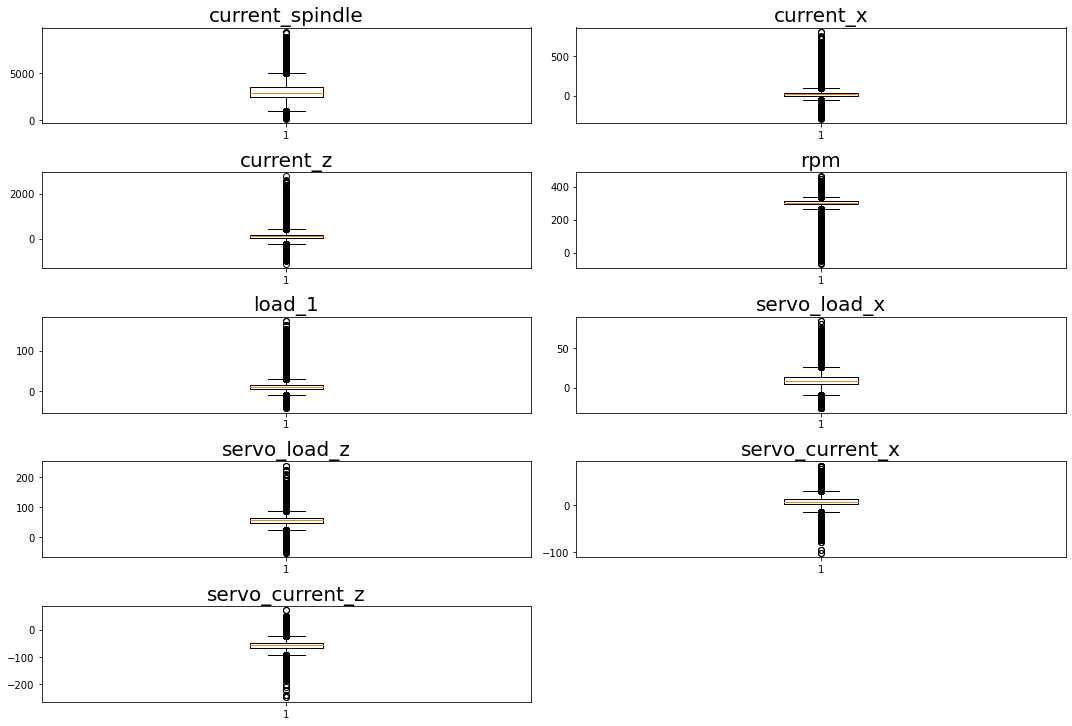

In [750]:
# boxplot

fig2 = plt.figure(figsize = (15,20))

for idx_box in range(0, len(temp_col)):
    globals()['ax_box{}'.format(idx_box)] = fig2.add_subplot(round(len(temp_col)+1/2),2,(idx_box+1))
    globals()['ax_box{}'.format(idx_box)].boxplot(df[temp_col[idx_box]])
    globals()['ax_box{}'.format(idx_box)].set_title('{}'.format(temp_col[idx_box]), fontsize = 20)
fig2.tight_layout()

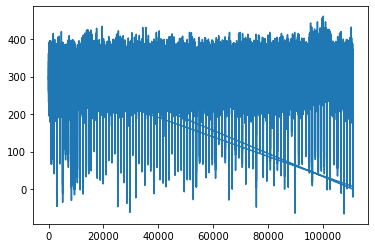

In [751]:
plt.plot(df['rpm'])

# 1. Current_spindle에 대한 실험

In [752]:
df[df['current_spindle'] < 0]['shot_no'].unique()

array([], dtype=int64)

In [753]:
df_mod1 = df.groupby('shot_no').mean()
df_mod1 = df_mod1.reset_index()

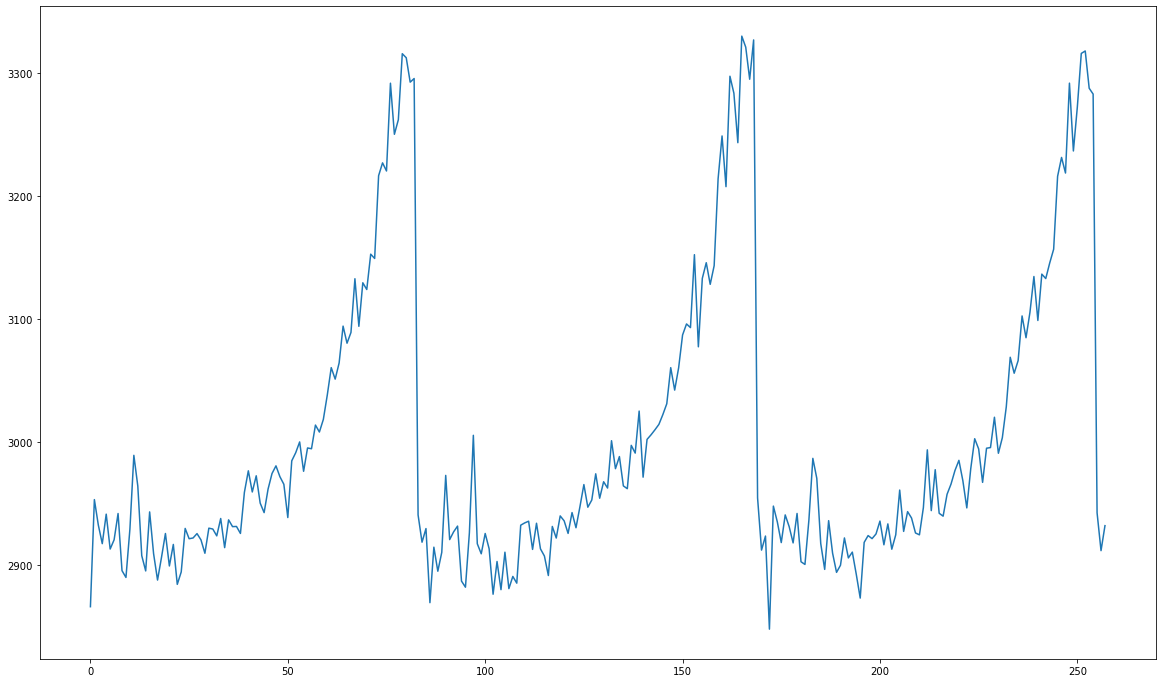

In [754]:
plt.figure(figsize = (20,12))
plt.plot(df_mod1['current_spindle'])

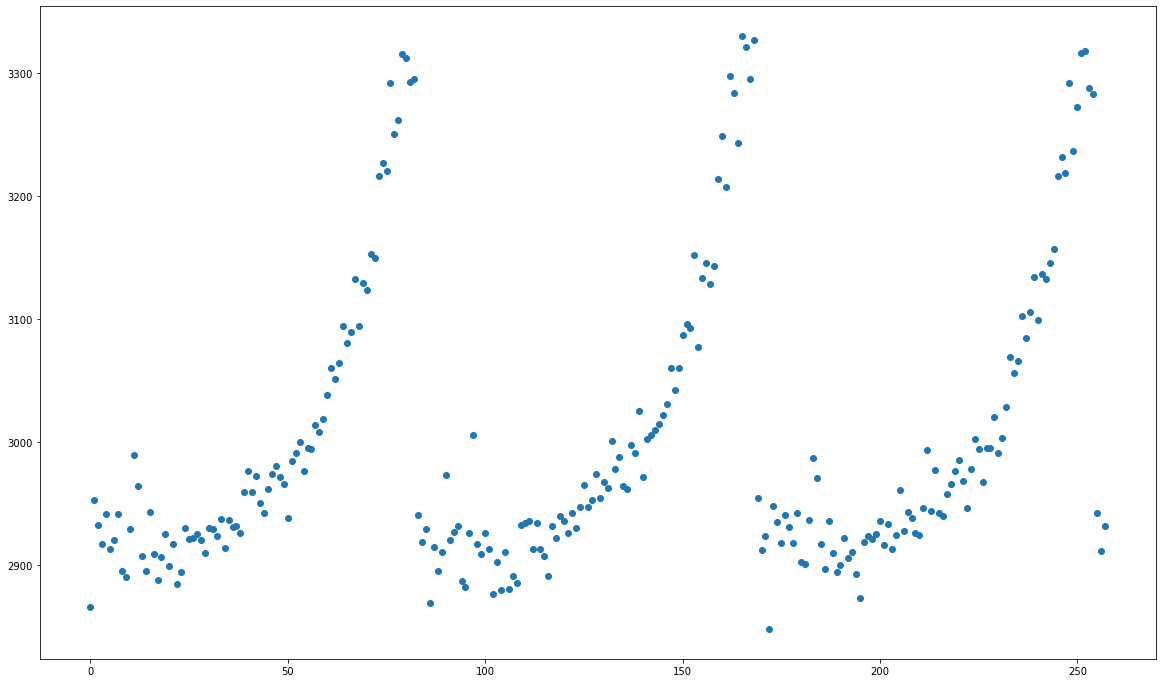

In [755]:
plt.figure(figsize = (20,12))
plt.scatter(df_mod1.index, df_mod1['current_spindle'])

In [756]:
# 아래로 도출되는 값에 대하여 삭
df_mod1[df_mod1['shot_no'] == 8]

shot_no  current_spindle  current_x  current_z         rpm    load_1  \
7        8      2941.921076   14.75426   96.35157  297.541704  9.855605   

   servo_load_x  servo_load_z  servo_current_x  servo_current_z  
7       7.89148     57.390135         7.217937       -57.394619

# Data scaling

In [757]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [758]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
parameter = df_mod1.iloc[:, 1:]
shot_no = df_mod1['shot_no']
sts_data = pd.DataFrame(standard_scaler.fit_transform(parameter), columns = parameter.columns)
sts_data_temp = sts_data.copy()
# sts_data = pd.concat([shot_no, sts_data], axis = 1)
mms_data = pd.DataFrame(minmax_scaler.fit_transform(parameter), columns = parameter.columns)
mms_data_temp = mms_data.copy()
# mms_data = pd.concat([shot_no, mms_data], axis = 1)
rbs_data = pd.DataFrame(robust_scaler.fit_transform(parameter), columns = parameter.columns)
rbs_data_temp = rbs_data.copy()
# rbs_data = pd.concat([shot_no, rbs_data], axis = 1)

No handles with labels found to put in legend.


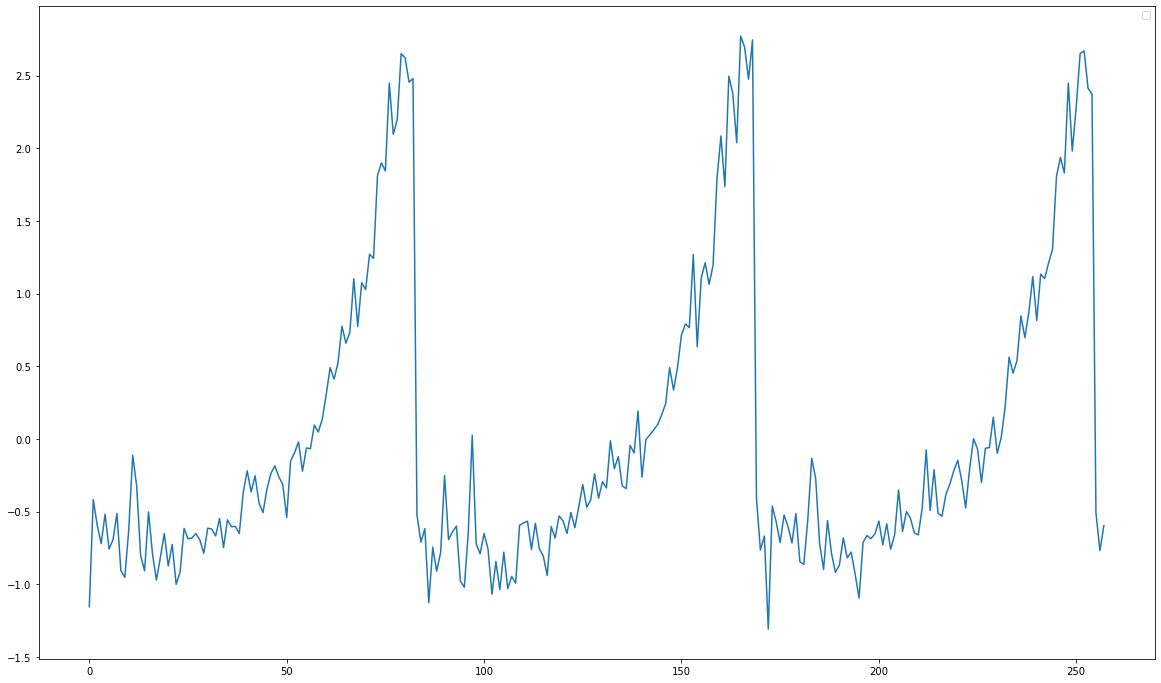

In [759]:
#  Standard scaler
plt.figure(figsize = (20,12))
plt.plot(sts_data['current_spindle'])
plt.legend()
# plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
# plt.xlabel('Shot_no', fontsize = 20)
# plt.yticks(np.arange(0, 3000, 200), fontsize = 15)
# plt.ylabel('current_spindle', fontsize = 20)

No handles with labels found to put in legend.


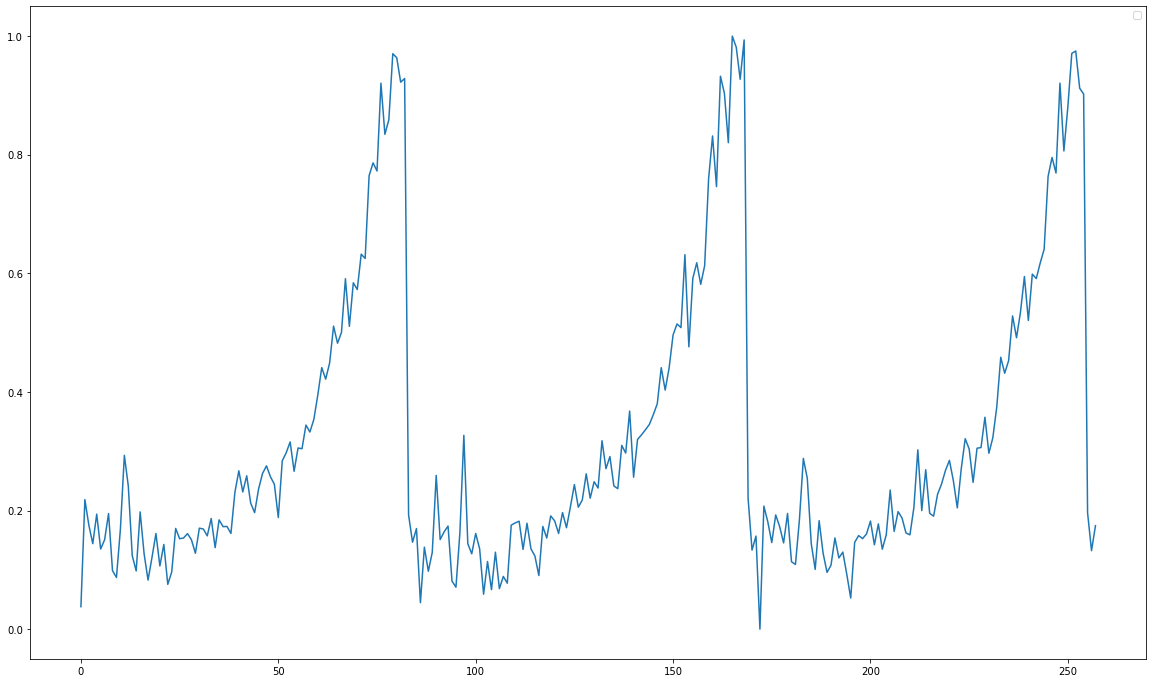

In [760]:
# Minmax scaler
plt.figure(figsize = (20,12))
plt.plot(mms_data['current_spindle'])
plt.legend()
# plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
# plt.xlabel('Shot_no', fontsize = 20)
# plt.yticks(np.arange(0, 3000, 200), fontsize = 15)
# plt.ylabel('current_spindle', fontsize = 20)

No handles with labels found to put in legend.


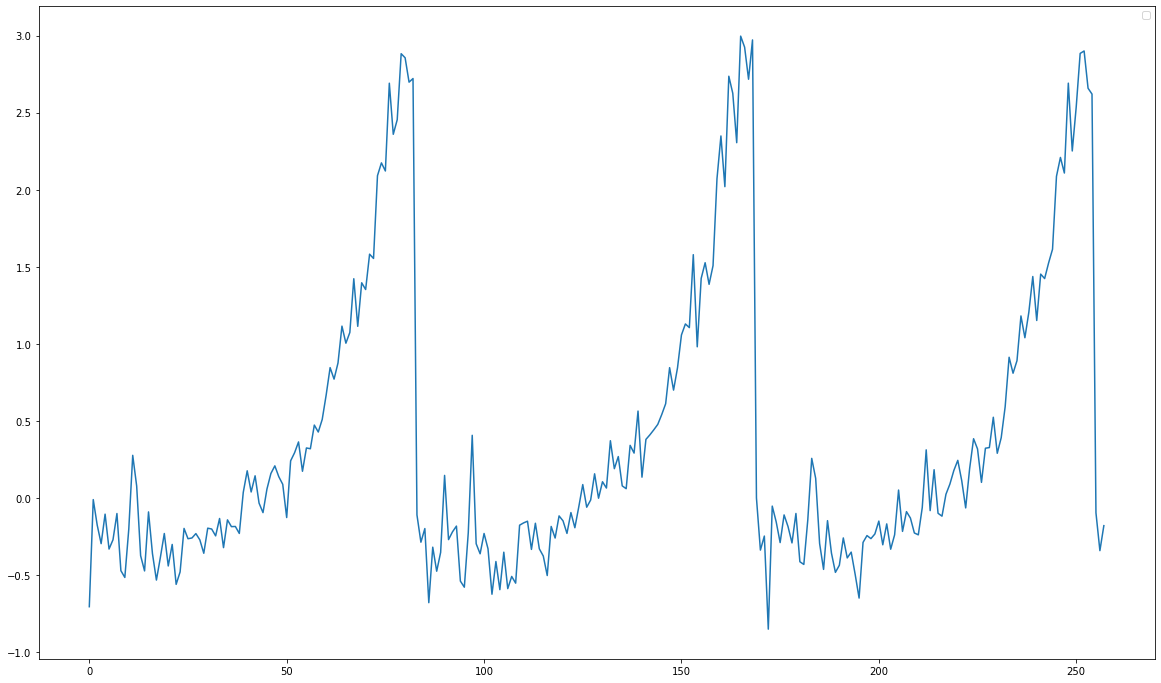

In [761]:
# Robust scaler
plt.figure(figsize = (20,12))
plt.plot(rbs_data['current_spindle'])
plt.legend()
# plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
# plt.xlabel('Shot_no', fontsize = 20)
# plt.yticks(np.arange(0, 3000, 200), fontsize = 15)
# plt.ylabel('current_spindle', fontsize = 20)

# 0. 기계학습 기반의 이상 탐지 기법
 - Chandola, V., Banerjee, A., & Kumar, V. (2009). Anomaly detection: A survey. ACM computing surveys (CSUR), 41(3), 15 참조
 - 기계학습(Machine Learning) 기반 이상 탐지(Anomaly Detection) 기법 연구 : 보건사회 분야를 중심으로, 오미애, 박아연, 김용대, 진재현, 2018 참조
 - Deep learning 이상탐지 기법은 추가적 조사 필요
 1. 분류 기반 이상 탐지 기법
  (1) 결정 규칙(Decision rule) 기반
  (2) SVM 기반
  (3) 신경망 기반
  (4) 베이지안 네트워크 기반
 2. NN(Nearest neighbor) 기반 이상 탐지 기법
  (1) k번째로 가까운 개체와의 거리 이용(거리 기반)
  (2) 상대 밀도 기반(밀도 기반)
 3. 군집화(Clustering) 기반 이상 탐지 기법
  (1) 근본 가정에 따른 군집화 기반 이상 탐지 기법
 4. 통계적 기법
  (1) 모수적 기법 - 1) 정규모형, 2) 회귀모형, 3) 혼합 모수적 모형
  (2) 비모수적 기법 - 1) 히스토그램, 2) 커널 함수
 5. 정보 이론 기법
 6. 스펙트럴 이상 탐지 기법
 7. 맥락적 이상 탐지
  (1) 점 이상 문제로 축소
  (2) 자료 구조 활용
 8. 딥러닝 이상 탐지 기법
  (1) Deep Embedded Clustering(DEC)
  (2) Deep Autoencoding Gaussian Mixture Model(DAGMM)

# 1. 분류 기반 이상 탐지 기법

In [762]:
# 이상탐지 결과값을 도출하기 위하여 새 변수 생성
df_mod2 = df_mod1.copy()


# (1) 결정 규칙 기반 - Isolation forest

1. Isolation Forest는 기본적으로 데이터셋을 의사결정나무 형태로 표현해 정상값을 분리하기 위해서는 의사결정나무를 깊숙하게 타고 내려가야 하고, 반대로 이상값은 인사결정나무 상단부에서 분리할 수 있음

# (1-1) Current spindle

In [763]:
# 학습 모델
IF = IsolationForest(random_state = 42, contamination = 0.1, n_estimators = 100, max_samples = 30)
IF.fit(df_mod2[['current_spindle']])
score = IF.decision_function(df_mod2[['current_spindle']])
df_mod2['IF_Outliers'] = pd.Series(IF.predict(df_mod2[['current_spindle']])).apply(lambda x: 1 if x == -1 else 0)
df_mod2['IF_score'] = score
# df_mod2 = pd.concat([shot_no, df_mod2], axis = 1)
outlier = df_mod2.query('IF_Outliers == 1')
outlier

shot_no  current_spindle  current_x   current_z         rpm     load_1  \
73        74      3216.734505  26.805735  110.551341  328.661425  11.414431   
74        75      3227.170330  27.768315  109.992674  328.728938  11.665751   
76        77      3291.969725  30.612844  109.906422  328.849541  12.078899   
77        78      3250.409132  29.492237  107.856621  328.610959  11.643836   
78        79      3262.255858  28.942830  115.131209  328.632615  11.627929   
79        80      3315.960766  33.237226  108.109489  328.912409  12.183394   
80        81      3312.663381  28.850644   86.120546  298.604246  12.102350   
81        82      3292.811550  26.219605   85.379939  298.670213  11.853343   
82        83      3295.770132  28.031479   86.852123  298.550512  11.923133   
160      161      3249.055861  27.723443  105.189560  327.668498  12.269645   
162      163      3297.637615  30.623853  114.897248  326.572477  12.078904   
163      164      3283.788128  28.311416  113.962557  329.037443  11.538750   
164      165      3243.582006  32.317713  102.934396  327.775070  11.425422   
165      166      3330.260949  31.301095  108.245438  329.023723  11.649289   
166      167      3321.272934  31.454132   93.021986  298.027293  11.753827   
167      168      3295.190729  23.867781   90.696049  299.070669  11.950524   
168      169      3327.174963  27.939239   79.718887  297.724744  12.021165   
246      247      3231.577839  28.758242  110.218864  328.636447  12.269645   
247      248      3218.902574  27.756434  105.276654  328.588235  11.582992   
248      249      3292.011927  31.861468  105.122018  328.138532  12.078904   
249      250      3236.841096  29.904110  114.504110  327.590868  11.538750   
250      251      3272.625117  27.636364  116.716026  327.626992  11.425422   
251      252      3316.196168  34.377737  115.665146  327.942518  11.649289   
252      253      3318.185747  28.717968   86.439727  298.188779  11.753827   
253      254      3287.876140  26.754559   83.215805  297.459726  11.950524   
254      255      3283.111274  27.046120   86.144217  297.827233  12.021165   

     servo_load_x  servo_load_z  servo_current_x  servo_current_z  \
73       9.550416     56.887142         9.067530       -56.886216   
74       9.525641     56.512821         9.110806       -56.511905   
76      10.161468     56.438532         9.743119       -56.437615   
77      10.047489     56.105936         9.663927       -56.105936   
78      10.076851     56.336457         9.291471       -56.338332   
79      10.666971     56.631387        10.149635       -56.630474   
80      11.455648     55.673237        11.059136       -55.670205   
81      11.481003     55.259878        11.151216       -55.260638   
82      11.555637     55.295754        11.071742       -55.290630   
160      9.021015     56.208134         8.987140       -56.189742   
162     10.652816     57.405437        10.127447       -57.346177   
163      9.970298     55.620203         9.740399       -56.632682   
164     10.071482     57.081214         9.627892       -55.400002   
165     10.618970     56.684809        10.122735       -57.402522   
166     11.422286     56.489353        10.859608       -54.611054   
167     11.461378     56.311446        10.833934       -56.073704   
168     11.564804     55.197501        11.463728       -55.704677   
246      9.021015     56.208134         8.987140       -56.189742   
247      9.887020     56.964969         9.069057       -56.566212   
248     10.652816     57.405437        10.127447       -57.346177   
249      9.970298     55.620203         9.740399       -56.632682   
250     10.071482     57.081214         9.627892       -55.400002   
251     10.618970     56.684809        10.122735       -57.402522   
252     11.422286     56.489353        10.859608       -54.611054   
253     11.461378     56.311446        10.833934       -56.073704   
254     11.564804     55.197501        11.463728       -55.704677   

     IF

Text(0, 0.5, 'current_spindle')

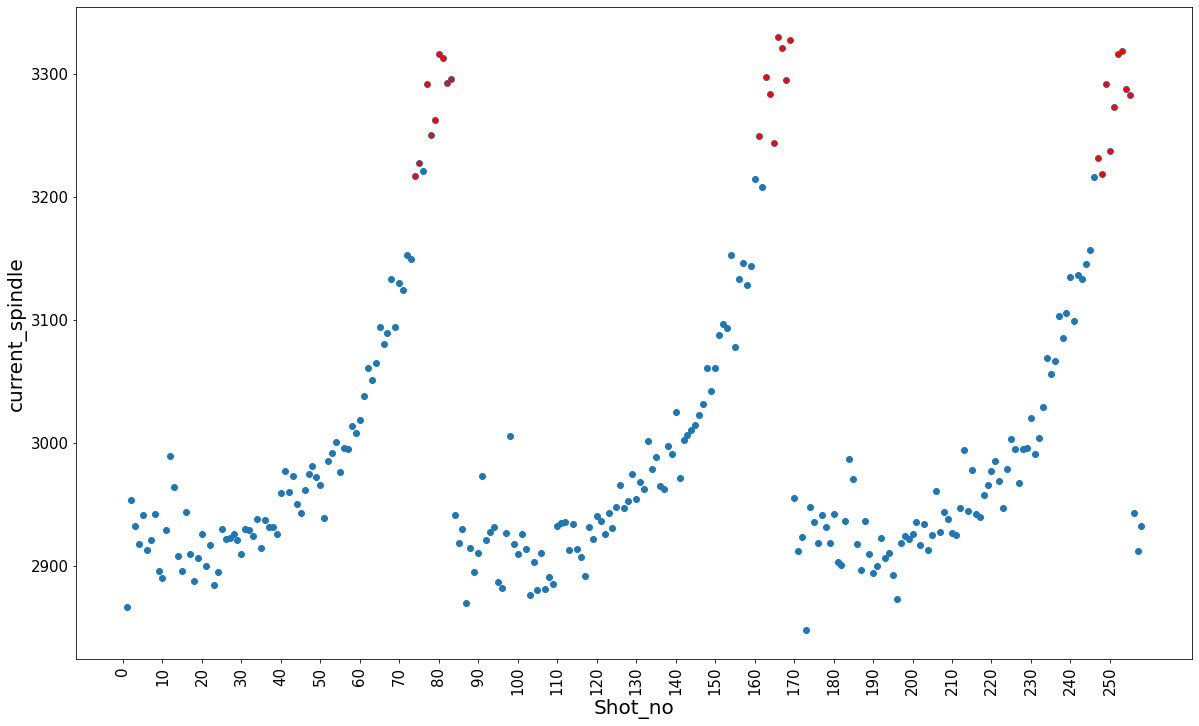

In [764]:
plt.figure(figsize = (20,12))
plt.scatter(df_mod2['shot_no'], df_mod2['current_spindle'])
plt.scatter(outlier['shot_no'], outlier['current_spindle'], color = 'red', s = 20)
plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
plt.xlabel('Shot_no', fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel('current_spindle', fontsize = 20)

In [765]:
# 테스트셋 적용
test_data = pd.read_csv('Tool5_small_data_processing.csv')
test_data_result = test_data.copy()
test_data_result = test_data_result[['shot_no','current_spindle','current_x','current_z','rpm','load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z']]
test_data_result = test_data_result.groupby('shot_no').mean()
test_data_result = test_data_result.reset_index()
test_data_result['Spindle_IF_Outliers'] = pd.Series(IF.predict(test_data_result[['current_spindle']])).apply(lambda x: 1 if x == -1 else 0)
test_outlier = test_data_result.query('Spindle_IF_Outliers == 1')
test_outlier

shot_no  current_spindle  current_x   current_z         rpm      load_1  \
186     6207      5737.200000  15.000000   10.200000  209.400000  116.200000   
265     6298      3216.734505  26.805735  110.551341  328.661425   11.414431   
266     6299      3227.170330  27.768315  109.992674  328.728938   11.665751   
268     6301      3291.969725  30.612844  109.906422  328.849541   12.078899   
269     6302      3250.409132  29.492237  107.856621  328.610959   11.643836   
270     6303      3262.255858  28.942830  115.131209  328.632615   11.627929   
271     6304      3315.960766  33.237226  108.109489  328.912409   12.183394   
272     6305      3312.663381  28.850644   86.120546  298.604246   12.102350   
273     6306      3292.811550  26.219605   85.379939  298.670213   11.853343   
274     6307      3295.770132  28.031479   86.852123  298.550512   11.923133   
587     6646      6987.000000  37.250000   11.000000  178.000000  118.500000   
590     6649      5602.200000  18.200000   10.200000  189.600000  119.200000   
591     6650      5308.866667   3.400000    8.666667  222.200000   38.000000   

     servo_load_x  servo_load_z  servo_current_x  servo_current_z  \
186      5.400000     72.200000         5.400000       -72.200000   
265      9.550416     56.887142         9.067530       -56.886216   
266      9.525641     56.512821         9.110806       -56.511905   
268     10.161468     56.438532         9.743119       -56.437615   
269     10.047489     56.105936         9.663927       -56.105936   
270     10.076851     56.336457         9.291471       -56.338332   
271     10.666971     56.631387        10.149635       -56.630474   
272     11.455648     55.673237        11.059136       -55.670205   
273     11.481003     55.259878        11.151216       -55.260638   
274     11.555637     55.295754        11.071742       -55.290630   
587      4.250000     70.250000         4.250000       -70.250000   
590      4.400000     70.400000         4.400000       -70.400000   
591      4.133333     68.400000         4.133333       -68.400000   

     Spindle_IF_Outliers  
186                    1  
265                    1  
266                    1  
268                    1  
269                    1  
270                    1  
271                    1  
272                    1  
273                    1  
274                    1  
587                    1  
590                    1  
591                    1

Text(0.5, 1.0, 'To apply IsolationForest Test-set')

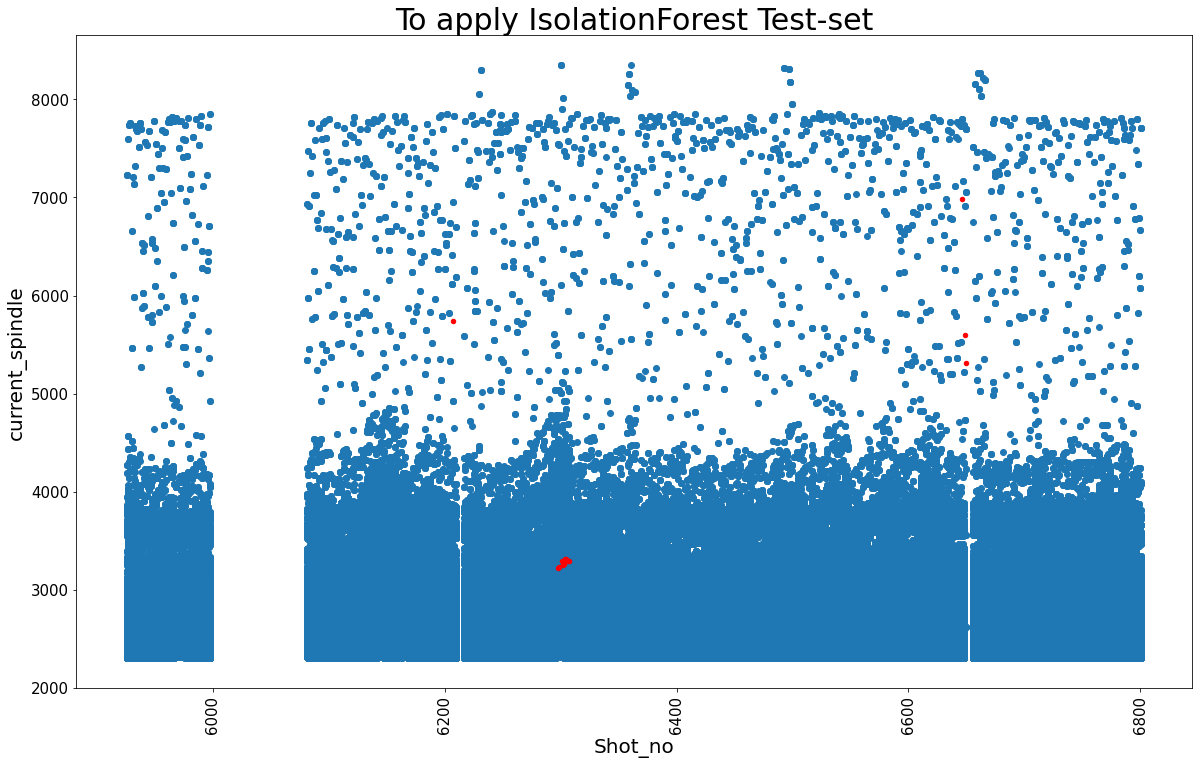

In [766]:
# 테스트셋 도출
plt.figure(figsize = (20,12))
plt.scatter(test_data['shot_no'], test_data['current_spindle'])
plt.scatter(test_outlier['shot_no'], test_outlier['current_spindle'], color = 'red', s = 20)
plt.xticks(fontsize = 15, rotation = 90)
plt.xlabel('Shot_no', fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel('current_spindle', fontsize = 20)
plt.title('To apply IsolationForest Test-set', fontsize = 30)

# Current spindle Isolation Forest 트리 도식화

In [767]:
from sklearn.tree import export_graphviz

model = IF.estimators_[10]

export_graphviz(model, out_file = 'tree.dot', feature_names = ['current_spindle'])

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'iForest-tree.png', '-Gdpi=1000'])

from IPython.display import Image
Image(filename = 'iForest-tree.png')

# (1-2) Scaling data 기반의 전체 Feature 모델 수립

In [768]:
# sts_data, sts_data, rbs_data (scaler 변경)
multi_shot = df_mod1[['shot_no']]
result = pd.DataFrame(sts_data, columns = parameter.columns)
result_corr = result.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'current_spindle'),
  Text(0, 1.5, 'current_x'),
  Text(0, 2.5, 'current_z'),
  Text(0, 3.5, 'rpm'),
  Text(0, 4.5, 'load_1'),
  Text(0, 5.5, 'servo_load_x'),
  Text(0, 6.5, 'servo_load_z'),
  Text(0, 7.5, 'servo_current_x'),
  Text(0, 8.5, 'servo_current_z')])

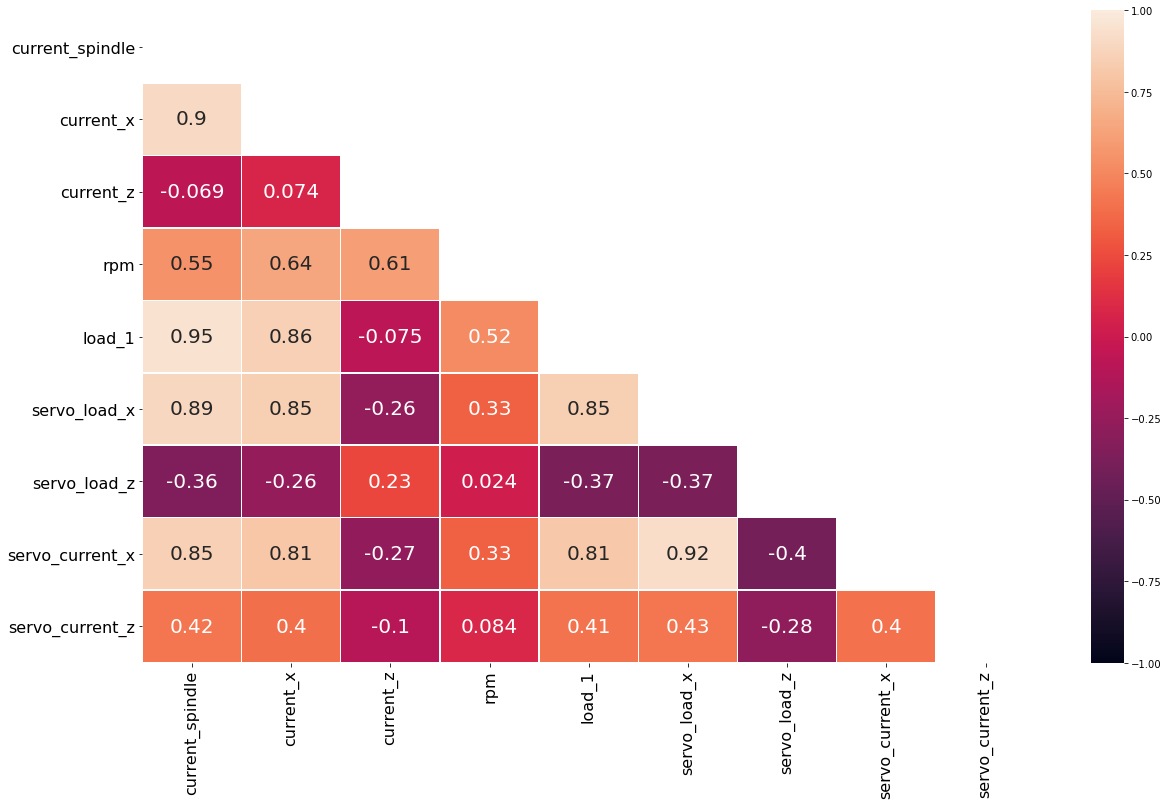

In [769]:
import seaborn as sns
plt.figure(figsize = (20, 12))

mask = np.triu(np.ones_like(result_corr, dtype=np.bool))
sns.heatmap(result_corr, mask = mask, vmin = -1, vmax = 1, annot = True, linewidths = .5, annot_kws = {'size':20})
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16)

In [770]:
# 학습 모델 (scaler 변경)
IF_multi = IsolationForest(random_state = 42, contamination = 0.1, n_estimators = 100, max_samples = 50, n_jobs = -1, max_features=9)
IF_multi.fit(sts_data)
score = IF_multi.decision_function(sts_data)
result['IF_Outliers'] = pd.Series(IF_multi.predict(sts_data)).apply(lambda x: 1 if x == -1 else 0)
result['IF_score'] = score
result['shot_no'] = multi_shot
multi_outlier = result.query('IF_Outliers == 1')
multi_outlier

current_spindle  current_x  current_z       rpm    load_1  servo_load_x  \
74          1.899730   1.993808   1.474888  2.962555  2.060300      0.909060   
76          2.447905   2.571589   1.466039  2.975684  2.523070      1.504961   
77          2.096320   2.343971   1.255720  2.949712  2.035753      1.398139   
78          2.196538   2.232376   2.002125  2.952069  2.017935      1.425658   
79          2.650859   3.104654   1.281665  2.982528  2.640115      1.978722   
80          2.622964   2.213651  -0.974497 -0.316914  2.549337      2.717875   
81          2.455026   1.679234  -1.050486 -0.309732  2.270424      2.741638   
82          2.480055   2.047262  -0.899433 -0.322763  2.348595      2.811586   
98         -0.721319   0.967898   4.682223  2.909081 -0.423249     -0.491357   
160         2.084872   1.984694   0.982068  2.847112  2.736725      0.436122   
162         2.495853   2.573825   1.978119  2.727796  2.523075      1.965456   
163         2.378692   2.104123   1.882216  2.996140  1.918046      1.325796   
164         2.038565   2.917882   0.750678  2.858714  1.791107      1.420626   
165         2.771832   2.711387   1.295614  2.994646  2.041861      1.933736   
166         2.695797   2.742471  -0.266378 -0.379723  2.158955      2.686609   
167         2.475153   1.201532  -0.505030 -0.266137  2.379277      2.723245   
168         2.745726   2.028526  -1.631335 -0.412659  2.458402      2.820177   
184        -0.271348   0.675290   3.849639  2.972950 -0.423249     -0.491357   
246         1.937015   2.194882   1.498097  2.952486  2.736725      0.436122   
248         2.448262   2.825210   0.975138  2.898282  2.523075      1.965456   
249         1.981540   2.427631   1.937781  2.838661  1.918046      1.325796   
250         2.284258   1.967006   2.164734  2.842594  1.791107      1.420626   
251         2.652850   3.336314   2.056909  2.876943  2.041861      1.933736   
252         2.669681   2.186702  -0.941747 -0.362143  2.158955      2.686609   
253         2.413275   1.787894  -1.272536 -0.441510  2.379277      2.723245   
254         2.372966   1.847116  -0.972068 -0.401502  2.458402      2.820177   

     servo_load_z  servo_current_x  servo_current_z  IF_Outliers  IF_score  \
74      -0.519080         0.956533         0.637995            1 -0.003964   
76      -0.626504         1.495597         0.748777            1 -0.036440   
77      -1.107448         1.428084         1.243381            1 -0.012219   
78      -0.774107         1.110555         0.896829            1 -0.021696   
79      -0.347630         1.842163         0.461182            1 -0.057131   
80      -1.733143         2.617537         1.893151            1 -0.065046   
81      -2.330873         2.696038         2.503902            1 -0.080048   
82      -2.278996         2.628284         2.459179            1 -0.084005   
98       3.048082        -0.293580        -1.778968            1 -0.025659   
160     -0.959667         0.851105         1.118409            1 -0.018488   
162      0.771671         1.823247        -0.606085            1 -0.066159   
163     -1.809832         1.493279         0.457890            1 -0.027649   
164      0.302835         1.397363         2.296080            1 -0.034165   
165     -0.270380         1.819230        -0.690107            1 -0.059321   
166     -0.553016         2.447434         3.472571            1 -0.072326   
167     -0.810273         2.425546         1.291446            1 -0.037417   
168     -2.421072         2.962463         1.841745            1 -0.102578   
184      3.048082        -0.293580        -1.778968            1 -0.028025   
246     -0.959667         0.851105         1.118409            1 -0.023860   
248      0.771671         1.823247        -0.606085            1 -0.057262   
249     -1.809832         1.493279         0.457890            1 -0.019784   
250      0.302835         1.397363         2.296080            1 -0.038006   
251     -0.270380         1.819230        -0.69010

- 일반적으로 Isolation forest의 이상지수 score는 0 ~ 1사이 값으로 표현됨
- Tree는 50 ~ 100개 정도의 모델을 사용하면 Score가 안정화된다는 논문이 존재함
- Score는 s(x,n) = 2^(E(h(x))/c(n))으로 계산함
  여기서, h(x) : x까지의 경로 길이, c(n) : 평균 경로 길이, n : 외부노드의 수
  비정상 판단 유무(Score를 이용)
  Score가 1에 가까우면 비정상, 0.5 이하이면 정상으로 판단, 모든 score가 0.5에 가까우면 전체 데이터에서 이상치를 발견하지 못한것으로 판단 가능

In [771]:
result[result['IF_score'] < 0]

current_spindle  current_x  current_z       rpm    load_1  servo_load_x  \
74          1.899730   1.993808   1.474888  2.962555  2.060300      0.909060   
76          2.447905   2.571589   1.466039  2.975684  2.523070      1.504961   
77          2.096320   2.343971   1.255720  2.949712  2.035753      1.398139   
78          2.196538   2.232376   2.002125  2.952069  2.017935      1.425658   
79          2.650859   3.104654   1.281665  2.982528  2.640115      1.978722   
80          2.622964   2.213651  -0.974497 -0.316914  2.549337      2.717875   
81          2.455026   1.679234  -1.050486 -0.309732  2.270424      2.741638   
82          2.480055   2.047262  -0.899433 -0.322763  2.348595      2.811586   
98         -0.721319   0.967898   4.682223  2.909081 -0.423249     -0.491357   
160         2.084872   1.984694   0.982068  2.847112  2.736725      0.436122   
162         2.495853   2.573825   1.978119  2.727796  2.523075      1.965456   
163         2.378692   2.104123   1.882216  2.996140  1.918046      1.325796   
164         2.038565   2.917882   0.750678  2.858714  1.791107      1.420626   
165         2.771832   2.711387   1.295614  2.994646  2.041861      1.933736   
166         2.695797   2.742471  -0.266378 -0.379723  2.158955      2.686609   
167         2.475153   1.201532  -0.505030 -0.266137  2.379277      2.723245   
168         2.745726   2.028526  -1.631335 -0.412659  2.458402      2.820177   
184        -0.271348   0.675290   3.849639  2.972950 -0.423249     -0.491357   
246         1.937015   2.194882   1.498097  2.952486  2.736725      0.436122   
248         2.448262   2.825210   0.975138  2.898282  2.523075      1.965456   
249         1.981540   2.427631   1.937781  2.838661  1.918046      1.325796   
250         2.284258   1.967006   2.164734  2.842594  1.791107      1.420626   
251         2.652850   3.336314   2.056909  2.876943  2.041861      1.933736   
252         2.669681   2.186702  -0.941747 -0.362143  2.158955      2.686609   
253         2.413275   1.787894  -1.272536 -0.441510  2.379277      2.723245   
254         2.372966   1.847116  -0.972068 -0.401502  2.458402      2.820177   

     servo_load_z  servo_current_x  servo_current_z  IF_Outliers  IF_score  \
74      -0.519080         0.956533         0.637995            1 -0.003964   
76      -0.626504         1.495597         0.748777            1 -0.036440   
77      -1.107448         1.428084         1.243381            1 -0.012219   
78      -0.774107         1.110555         0.896829            1 -0.021696   
79      -0.347630         1.842163         0.461182            1 -0.057131   
80      -1.733143         2.617537         1.893151            1 -0.065046   
81      -2.330873         2.696038         2.503902            1 -0.080048   
82      -2.278996         2.628284         2.459179            1 -0.084005   
98       3.048082        -0.293580        -1.778968            1 -0.025659   
160     -0.959667         0.851105         1.118409            1 -0.018488   
162      0.771671         1.823247        -0.606085            1 -0.066159   
163     -1.809832         1.493279         0.457890            1 -0.027649   
164      0.302835         1.397363         2.296080            1 -0.034165   
165     -0.270380         1.819230        -0.690107            1 -0.059321   
166     -0.553016         2.447434         3.472571            1 -0.072326   
167     -0.810273         2.425546         1.291446            1 -0.037417   
168     -2.421072         2.962463         1.841745            1 -0.102578   
184      3.048082        -0.293580        -1.778968            1 -0.028025   
246     -0.959667         0.851105         1.118409            1 -0.023860   
248      0.771671         1.823247        -0.606085            1 -0.057262   
249     -1.809832         1.493279         0.457890            1 -0.019784   
250      0.302835         1.397363         2.296080            1 -0.038006   
251     -0.270380         1.819230        -0.69010

In [772]:
print("Number of outliers detected: {}".format(len(multi_outlier)))
print("Number of normal samples detected: {}".format(len(result)))

Number of outliers detected: 26
Number of normal samples detected: 258


In [773]:
multi_outlier['shot_no'].values

array([ 75,  77,  78,  79,  80,  81,  82,  83,  99, 161, 163, 164, 165,
       166, 167, 168, 169, 185, 247, 249, 250, 251, 252, 253, 254, 255],
      dtype=int64)

In [774]:
multi_outlier['shot_no'].values[0]

75

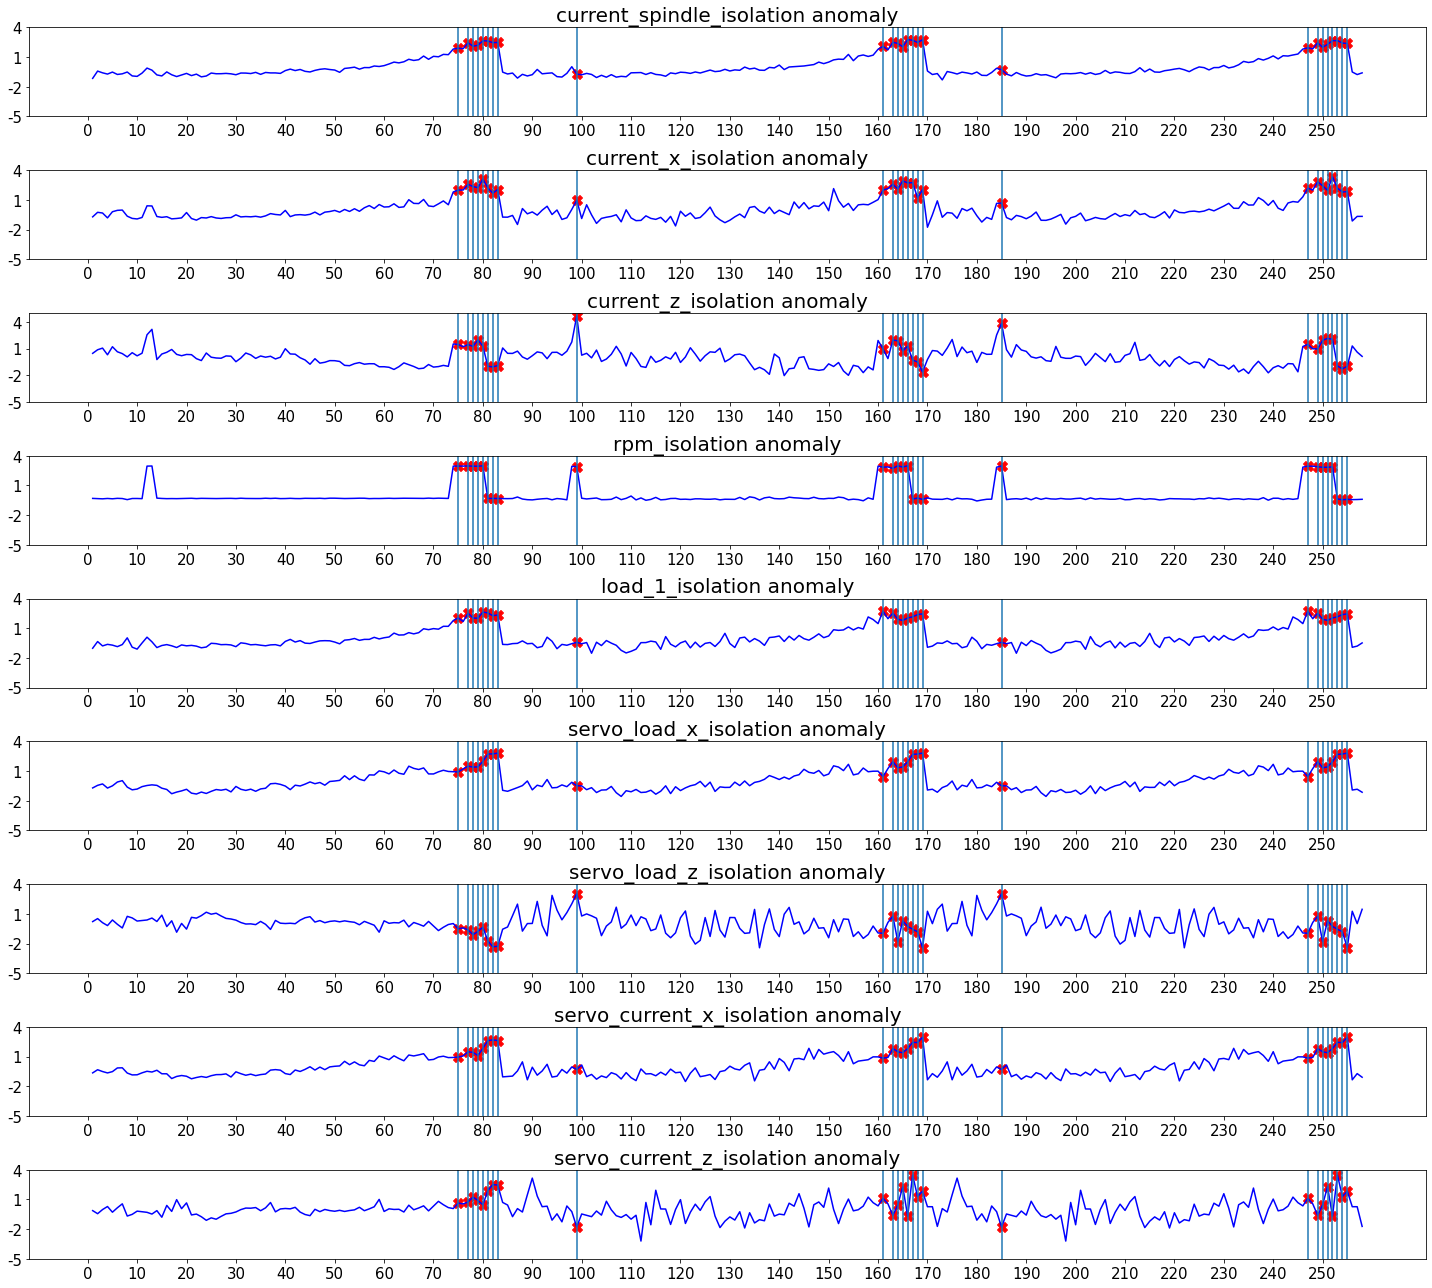

In [775]:
# Train 데이터 시각화
fig = plt.figure(figsize = (20,18))
temp_graph = list(parameter.columns)

for fig_idx in range(0, len(temp_graph)):
    locals()['ax_()'.format(fig_idx)] = fig.add_subplot(len(temp_graph), 1, fig_idx+1)
    locals()['ax_()'.format(fig_idx)].plot(result['shot_no'], result[temp_graph[fig_idx]], color = 'blue')
    locals()['ax_()'.format(fig_idx)].scatter(multi_outlier['shot_no'], multi_outlier[temp_graph[fig_idx]], color = 'red', s= 100, marker = 'X')
    for axv_idx in range(len(multi_outlier['shot_no'].values)):
        locals()['ax_()'.format(axv_idx)].axvline(x  = multi_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_idx)].set_title('{}_isolation anomaly'.format(temp_graph[fig_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_idx)].set_xticks(np.arange(0, 260, 10))
    locals()['ax_()'.format(fig_idx)].set_xticklabels(np.arange(0, 260, 10), fontsize = 15)
    locals()['ax_()'.format(fig_idx)].set_yticks(np.arange(-5, 5, 3))
    locals()['ax_()'.format(fig_idx)].set_yticklabels(np.arange(-5, 5, 3), fontsize = 15)
fig.tight_layout()

In [776]:
# 테스트셋 적용(scaler 변경(모델) standard, standard, robust)
test_multi_data = pd.read_csv('Tool5_small_data_processing.csv')
test_multi_data = test_multi_data[['shot_no', 'current_spindle', 'current_x', 'current_z', 'rpm', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z']]
test_multi_data = test_multi_data.groupby('shot_no').mean()
test_multi_data = test_multi_data.reset_index()
test_multi_shot_no = test_multi_data['shot_no']
test_multi_data_scaling = pd.DataFrame(standard_scaler.fit_transform(test_multi_data.drop('shot_no', axis = 1)), columns = test_multi_data.columns[1:])
scaling_temp = test_multi_data_scaling.copy()
test_multi_data_scaling['IF_score'] = pd.Series(IF_multi.decision_function(scaling_temp))
test_multi_data_scaling['IF_multi_Outliers'] = pd.Series(IF_multi.predict(scaling_temp)).apply(lambda x: 1 if x == -1 else 0)
test_multi_data_scaling['shot_no'] = test_multi_shot_no
test_multi_outlier = test_multi_data_scaling.query('IF_multi_Outliers == 1')
test_multi_outlier

current_spindle  current_x  current_z        rpm     load_1  \
123         0.696026   2.060124  -0.485356  -0.077193   0.114745   
125         0.480849   1.516991  -1.434251  -0.126629   0.042744   
127         0.517149   1.597738  -1.419934  -0.090399   0.065011   
128         0.574708   1.463518  -1.347932  -0.092467   0.063867   
129         0.742832   1.745796  -1.218069  -0.103399   0.121797   
130         0.791455   1.836436  -1.140280  -0.079372   0.130339   
131         0.746161   1.865858  -1.296303  -0.061486   0.109109   
132         0.590016   1.602880  -1.739075  -0.118677   0.122222   
133         0.845103   2.023210  -1.081904  -0.106077   0.136548   
135         0.848805   1.497701  -1.627996  -0.097236   0.133277   
137         0.720058   1.364857  -1.534428  -0.117232   0.103585   
148         0.826074   2.063254   0.085987  -0.117793   0.125256   
186        11.894479  -0.565868  -9.153022  -9.021800  15.104885   
265         0.981978   3.095417   1.379803   2.905684   0.193448   
266         1.027160   3.393939   1.321165   2.912436   0.229212   
267         0.998579   3.397666   1.067157   2.906086   0.181167   
268         1.307713   4.276106   1.312113   2.924498   0.288005   
269         1.127774   3.928575   1.096966   2.900637   0.226094   
270         1.179065   3.758189   1.860503   2.902803   0.223830   
271         1.411584   5.090000   1.123507   2.930785   0.302875   
272         1.397308   3.729600  -1.184441  -0.100372   0.291342   
273         1.311358   2.913642  -1.262174  -0.093774   0.255908   
274         1.324167   3.475554  -1.107655  -0.105746   0.265839   
320         0.335804   2.940960   1.747121   2.923197   0.041565   
322         0.151408   3.034796   1.536642   2.918916  -0.013107   
323         0.122991   2.490060   1.301042   2.878878  -0.005952   
452         0.118519   3.089476   1.543787   2.895272   0.000922   
587        17.305560   6.334472  -9.069055 -12.162153  15.432184   
590        11.309989   0.426541  -9.153022 -11.002022  15.531797   
591        10.039985  -4.163348  -9.313960  -7.741656   3.976689   
593        -0.025078   0.660762   3.382280   2.878185  -0.049621   
595        -0.073621   0.622129   3.100657   2.873191  -0.054357   
597        -0.058000   1.253862   3.230444   2.879235  -0.051973   
600        -0.057056   2.301694   2.147760   2.893045  -0.024996   

     servo_load_x  servo_load_z  servo_current_x  servo_current_z  IF_score  \
123      2.294631     -1.015320         2.423094         1.003666 -0.004270   
125      2.111170     -1.376155         2.169304         1.365360 -0.009645   
127      2.561620     -0.969973         2.642655         0.959082 -0.004076   
128      2.572818     -1.126453         2.682349         1.102842 -0.006291   
129      2.341413     -1.064664         2.448025         1.051874 -0.005057   
130      2.773922     -1.004562         2.819541         0.998183 -0.004196   
131      2.957444     -1.022043         2.979389         1.003471 -0.013197   
132      2.530481     -0.831471         2.758023         0.817994 -0.005929   
133      3.043167     -0.936763         2.907938         0.928284 -0.006704   
135      2.555682     -0.979571         2.670354         0.964608 -0.010385   
137      2.814497     -0.629825         2.886537         0.612795 -0.003646   
148      2.961088     -0.877524         2.972084         0.861156 -0.016589   
186     -3.326666     14.103064        -2.550038       -14.115615 -0.076783   
265      1.561101     -0.236794         1.712649         0.221456 -0.014770   
266      1.531925     -0.587330         1.762948         0.571894 -0.018151   
267      1.915207     -0.518429         1.929003         0.517642 -0.032509   
268      2.280711     -0.656898         2.497871         0.641446 -0.050274   
269      2.146482     -0.968360         2.405828         0.951970 -0.057069   
270      2.181061     -0.752487         1.972931         0.734396 -0.039536   
271      2.876020     -0.476297         2.97

In [777]:
from sklearn.tree import export_graphviz

model_multi = IF_multi.estimators_[8]

export_graphviz(model_multi, out_file = 'tree.dot', feature_names = parameter.columns)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'Multivariate_iForest-tree.png', '-Gdpi=1000'])

from IPython.display import Image
Image(filename = 'Multivariate_iForest-tree.png')

In [778]:
test_multi_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 123 to 600
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   current_spindle    34 non-null     float64
 1   current_x          34 non-null     float64
 2   current_z          34 non-null     float64
 3   rpm                34 non-null     float64
 4   load_1             34 non-null     float64
 5   servo_load_x       34 non-null     float64
 6   servo_load_z       34 non-null     float64
 7   servo_current_x    34 non-null     float64
 8   servo_current_z    34 non-null     float64
 9   IF_score           34 non-null     float64
 10  IF_multi_Outliers  34 non-null     int64  
 11  shot_no            34 non-null     int64  
dtypes: float64(10), int64(2)
memory usage: 3.5 KB


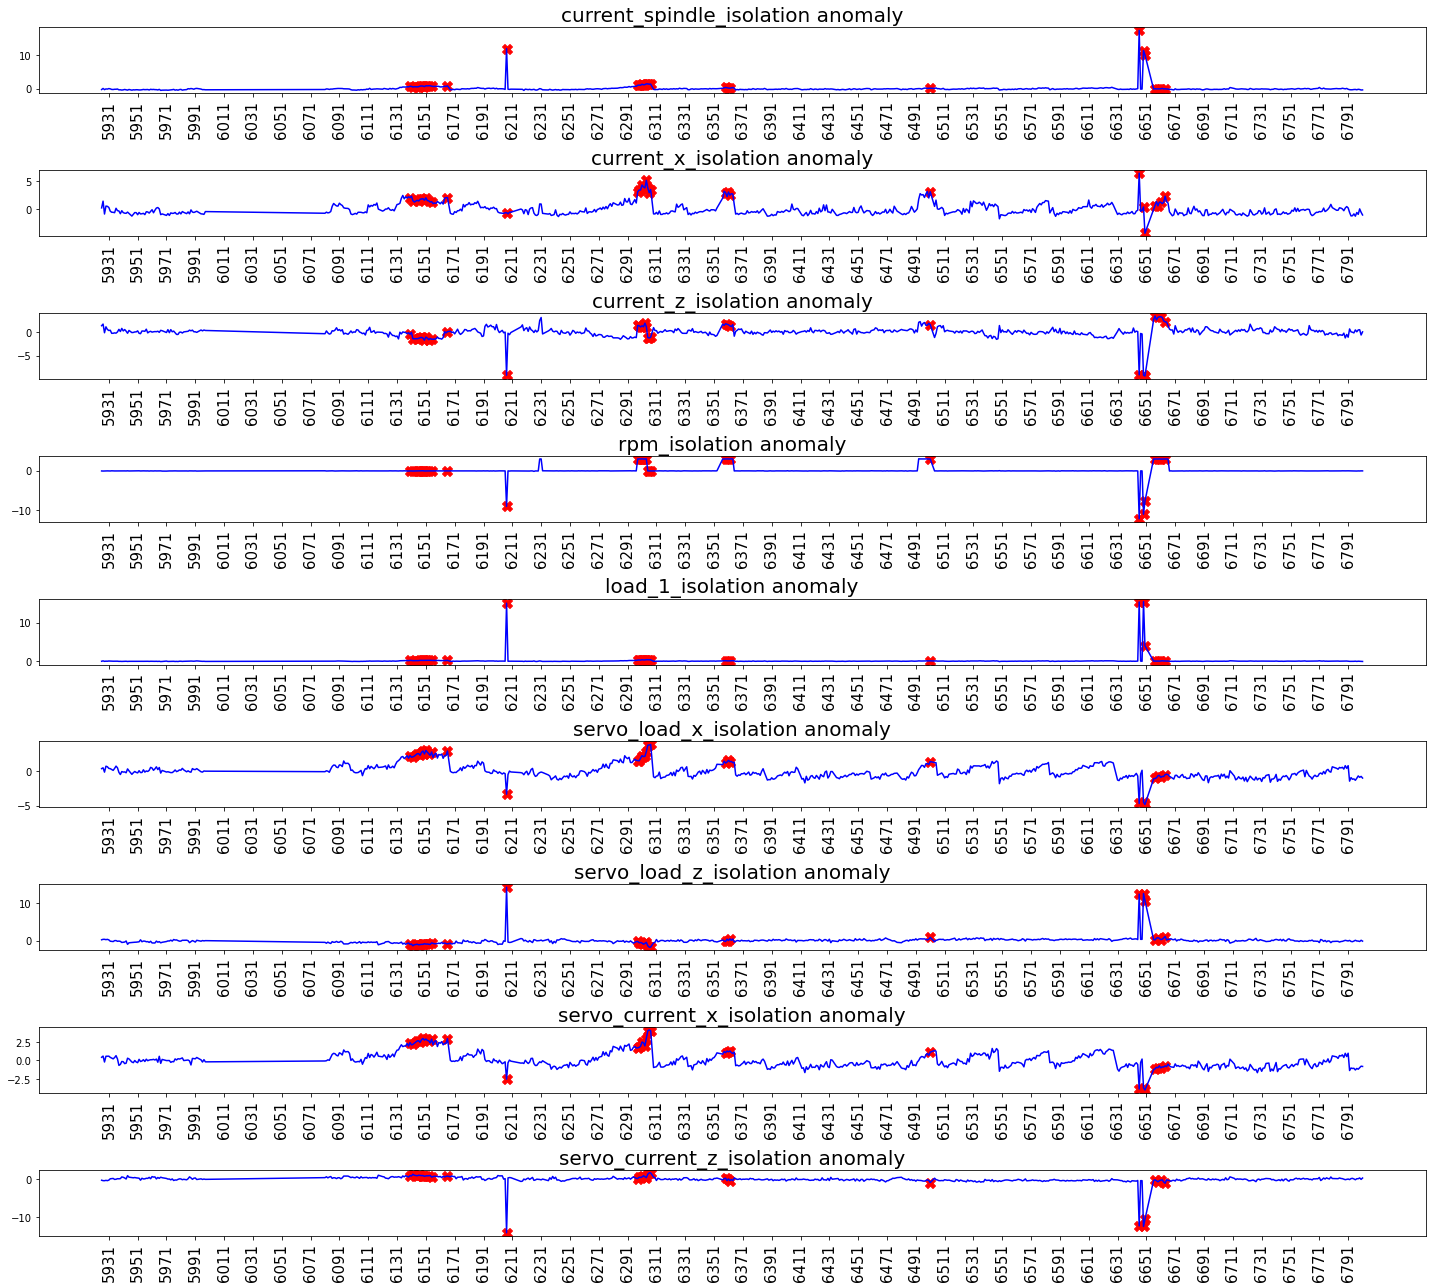

In [779]:
# 테스트 셋 시각화
fig5 = plt.figure(figsize = (20,18))
temp_multi_graph = list(parameter.columns)

for fig5_idx in range(0, len(temp_multi_graph)):
    locals()['ax_()'.format(fig5_idx)] = fig5.add_subplot(len(temp_multi_graph), 1, fig5_idx+1)
    locals()['ax_()'.format(fig5_idx)].plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling[temp_multi_graph[fig5_idx]], color = 'blue')
    locals()['ax_()'.format(fig5_idx)].scatter(test_multi_outlier['shot_no'], test_multi_outlier[temp_multi_graph[fig5_idx]], color = 'red', s= 100, marker = 'X')
#     for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#         locals()['ax_()'.format(axv_idx)].axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig5_idx)].set_title('{}_isolation anomaly'.format(temp_multi_graph[fig5_idx]), fontsize = 20)
    locals()['ax_()'.format(fig5_idx)].set_xticks(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20))
    locals()['ax_()'.format(fig5_idx)].set_xticklabels(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig5_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig5_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig5.tight_layout()

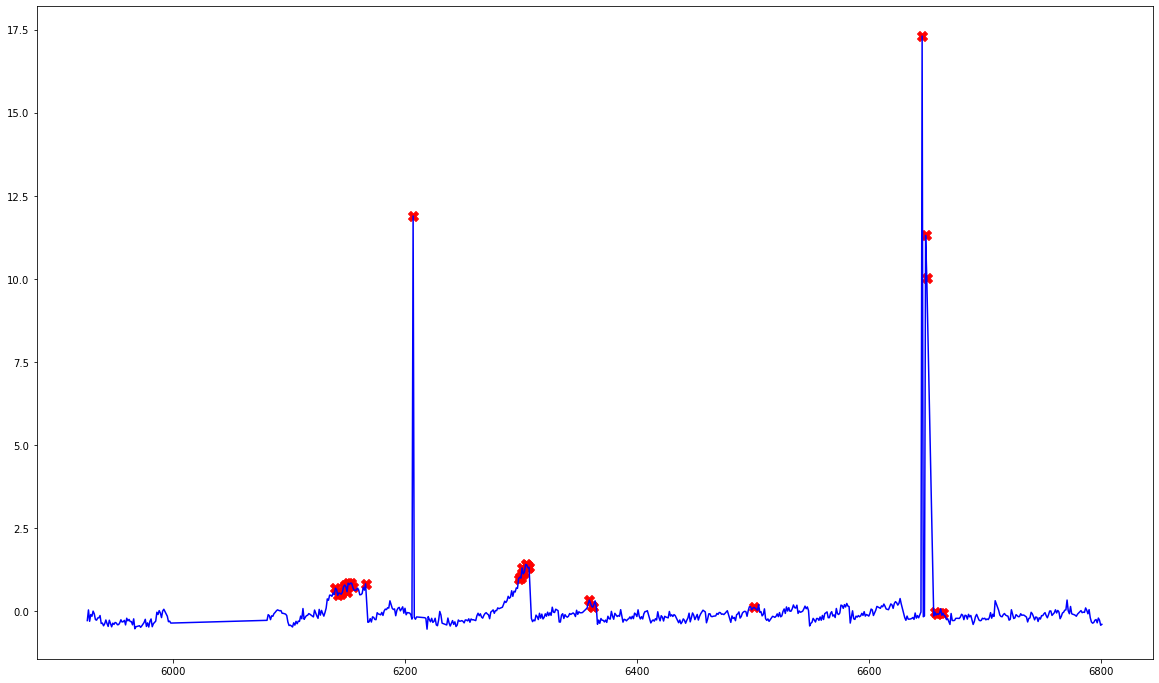

In [780]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['current_spindle'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['current_spindle'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

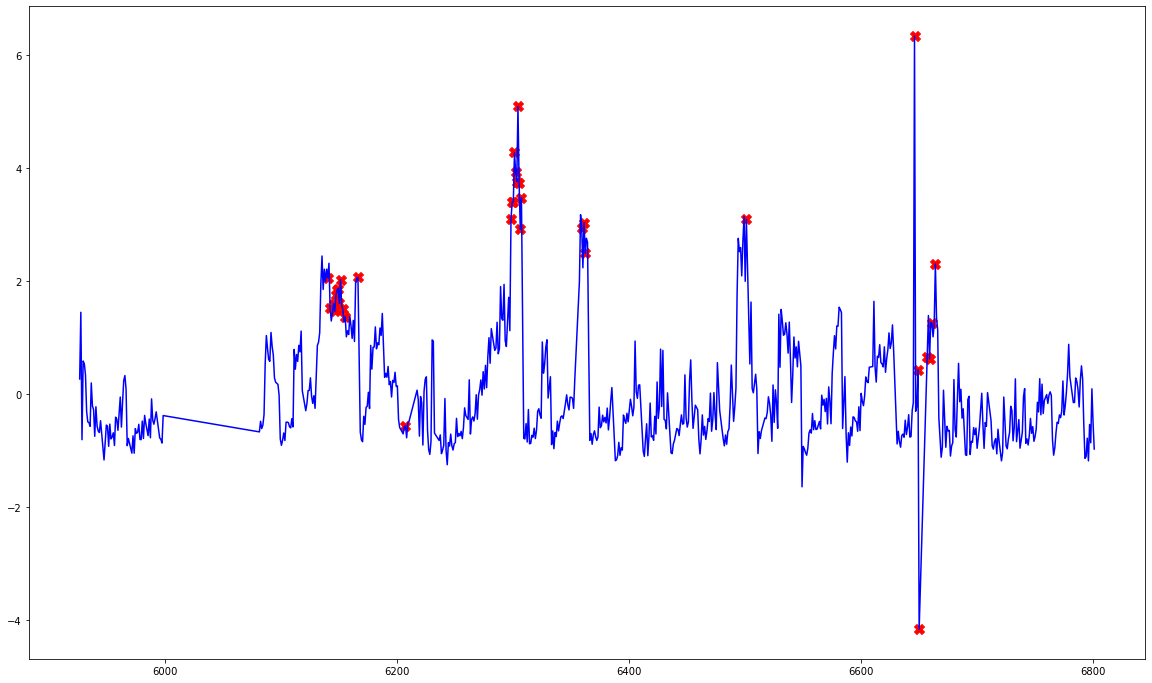

In [781]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['current_x'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['current_x'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

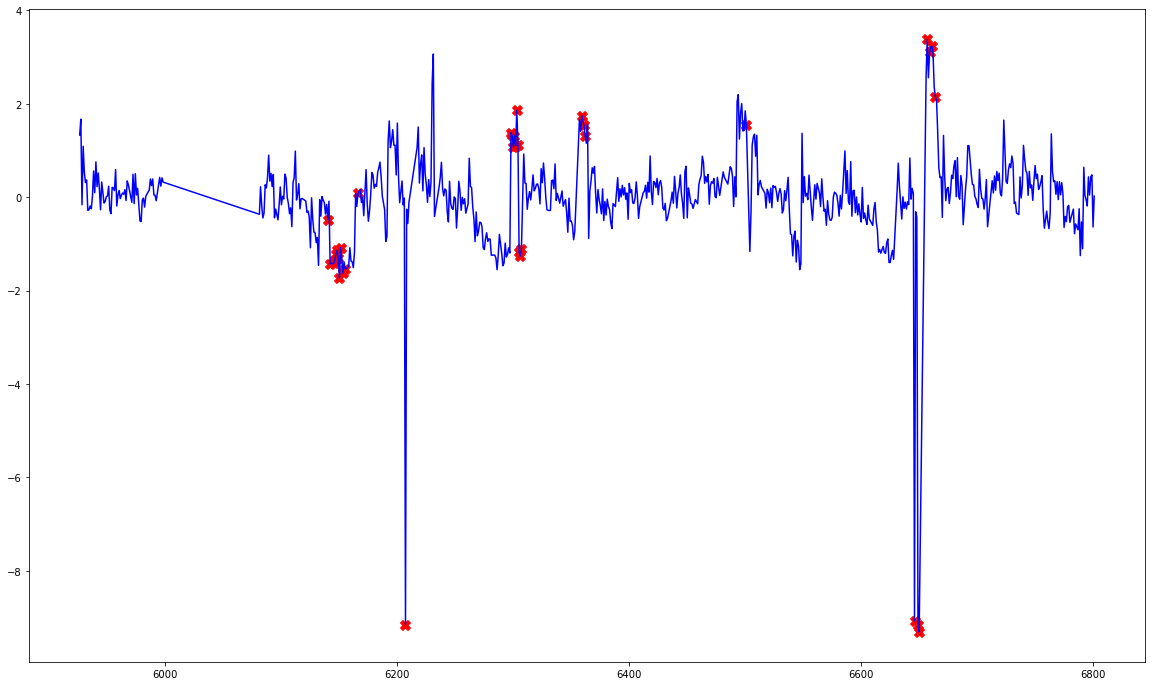

In [782]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['current_z'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['current_z'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

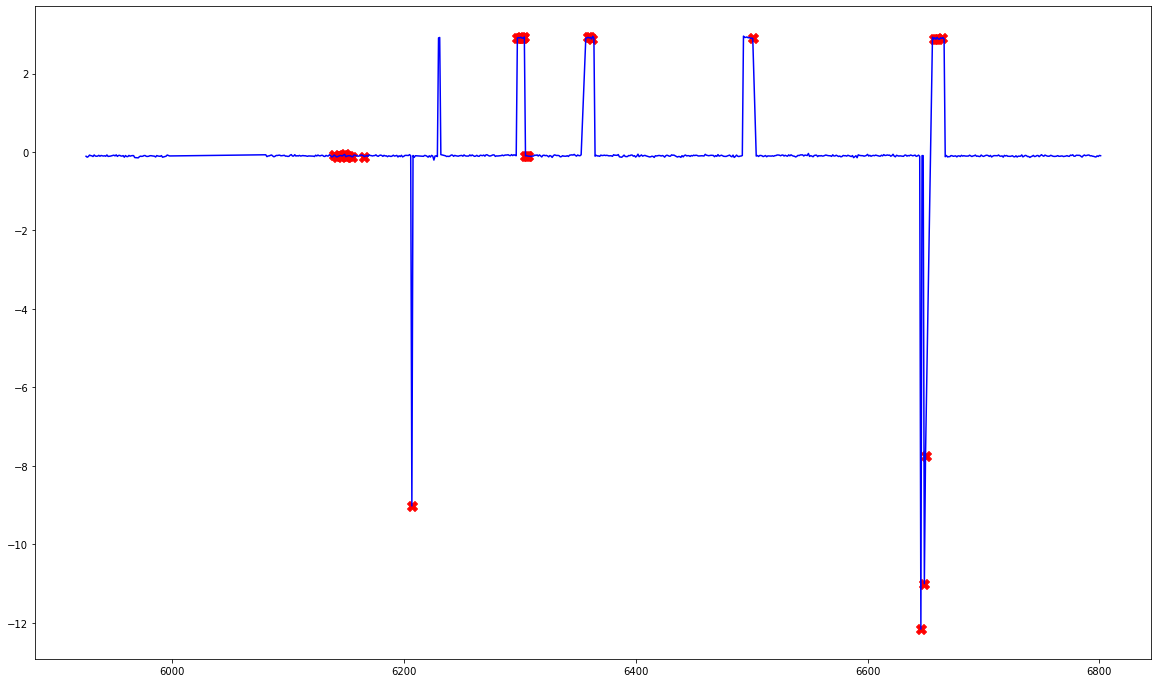

In [783]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['rpm'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['rpm'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

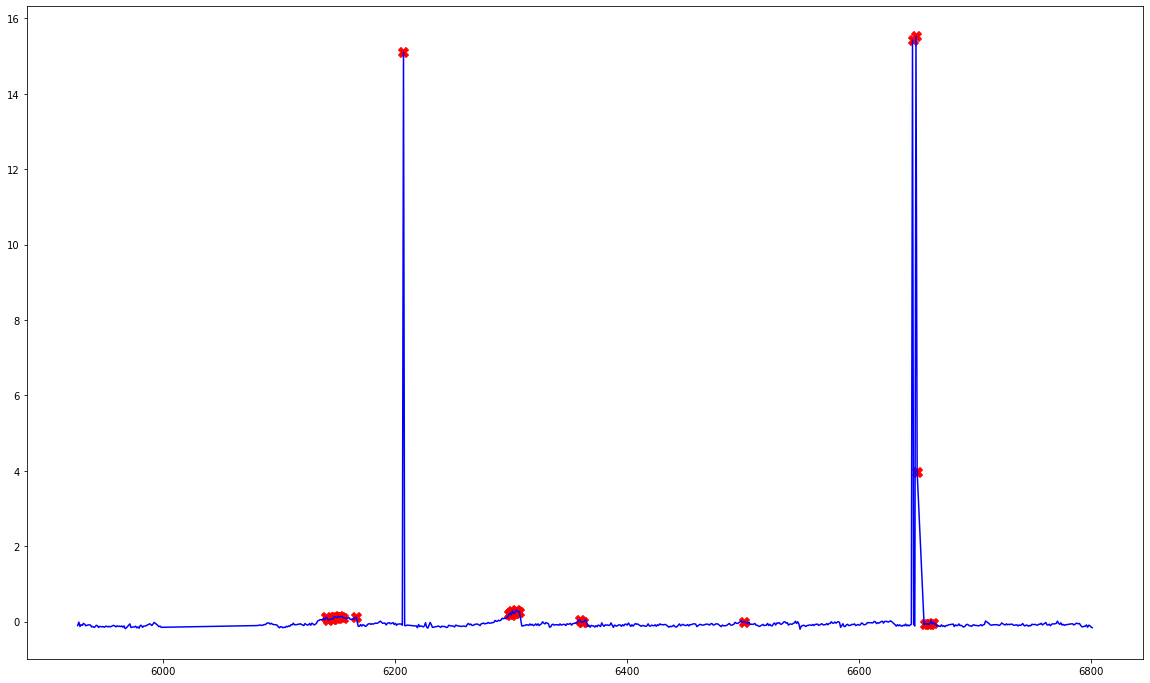

In [784]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['load_1'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['load_1'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

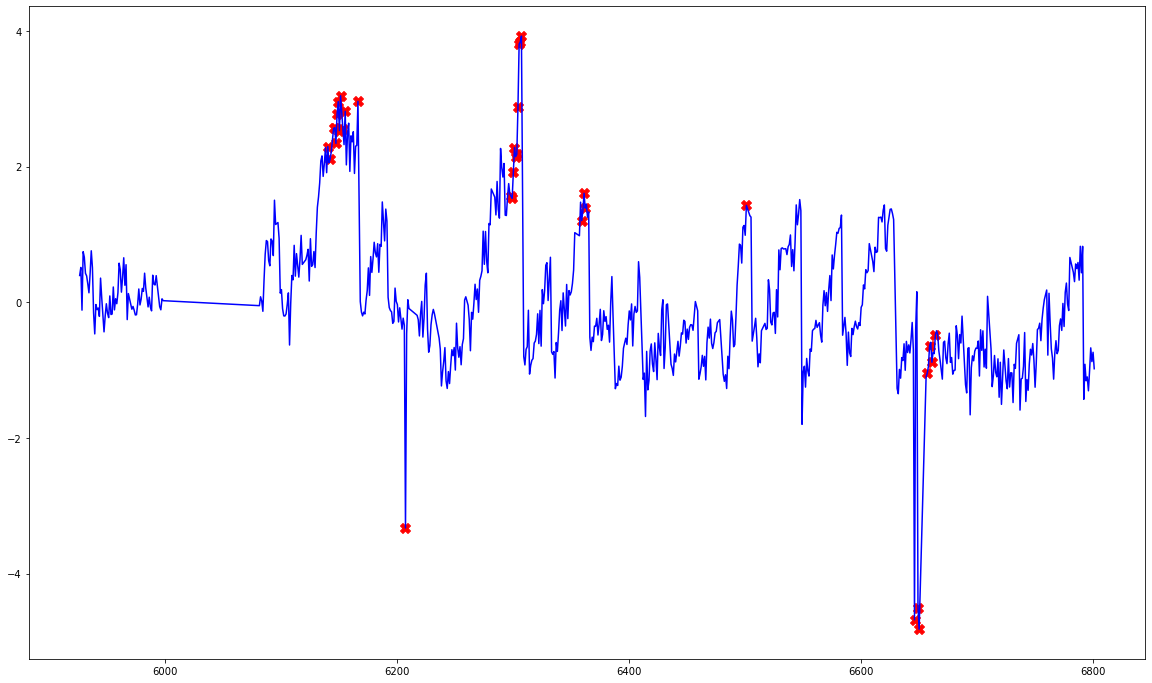

In [785]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['servo_load_x'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['servo_load_x'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

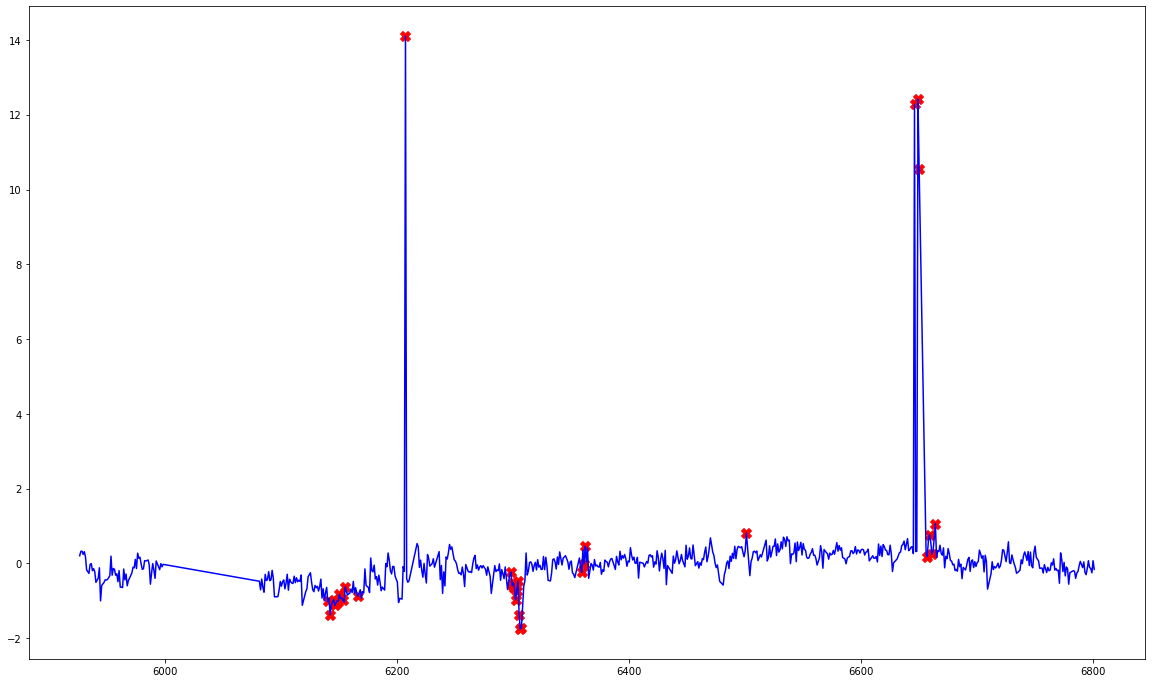

In [786]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['servo_load_z'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['servo_load_z'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

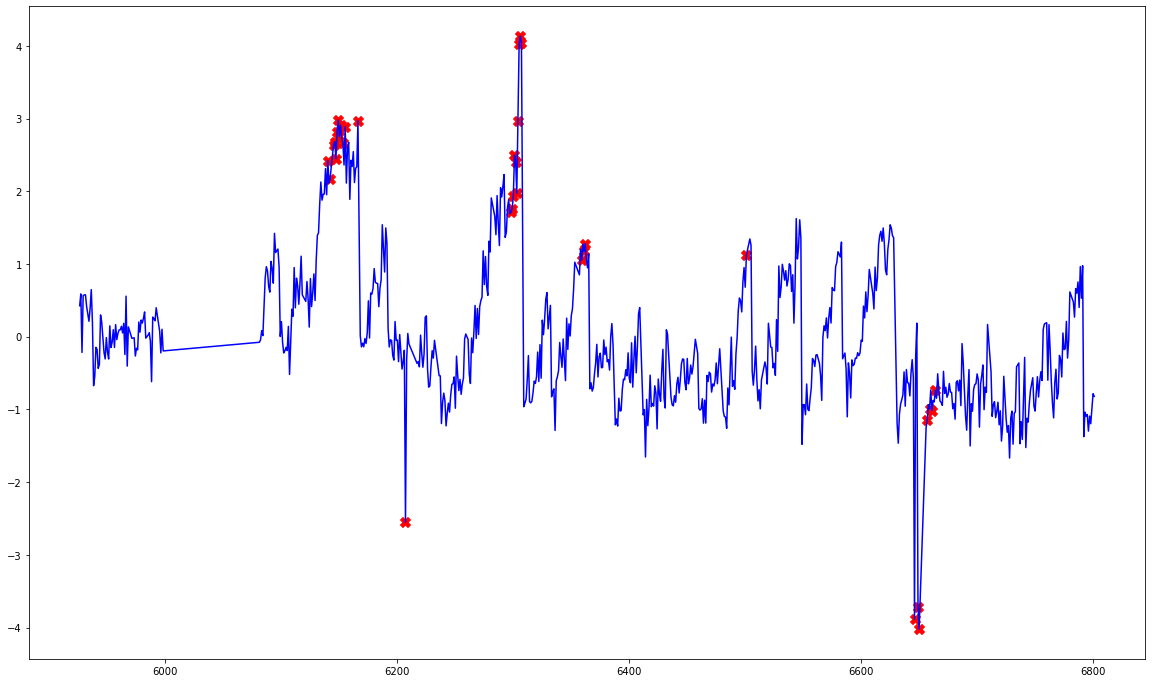

In [787]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['servo_current_x'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['servo_current_x'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

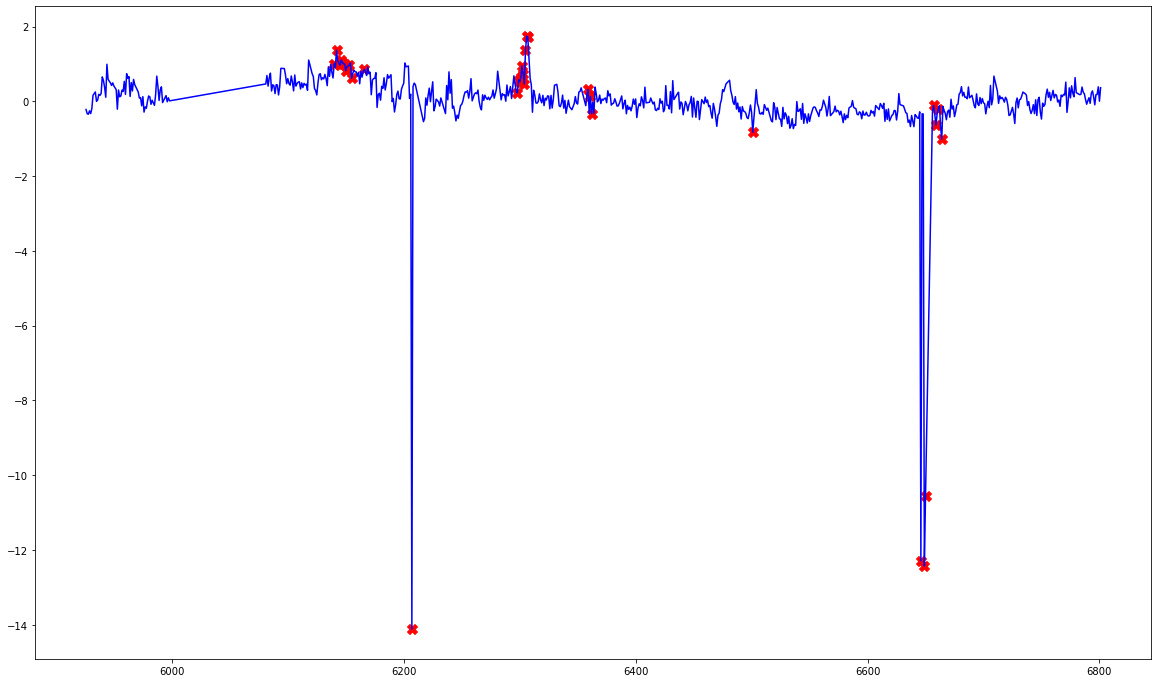

In [788]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['servo_current_z'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['servo_current_z'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

# (1-3) PCA-Isolation forest

# (1) 전체 Feature 차원축소

In [789]:
sts_data

current_spindle  current_x  current_z       rpm    load_1  servo_load_x  \
0          -1.154511  -0.718033   0.476742 -0.308455 -1.020835     -0.705178   
1          -0.417591  -0.258524   0.879777 -0.325220 -0.344329     -0.445018   
2          -0.592598  -0.330398   1.066333 -0.351192 -0.785607     -0.300315   
3          -0.720700  -0.821313   0.314725 -0.313702 -0.625995     -0.718465   
4          -0.517713  -0.199800   1.220632 -0.347824 -0.705756     -0.494238   
..               ...        ...        ...       ...       ...           ...   
253         2.413275   1.787894  -1.272536 -0.441510  2.379277      2.723245   
254         2.372966   1.847116  -0.972068 -0.401502  2.458402      2.820177   
255        -0.508350  -1.138029   1.307195 -0.430694 -0.924318     -0.917818   
256        -0.768795  -0.671702   0.615000 -0.421237 -0.803618     -0.836638   
257        -0.596854  -0.669662   0.135591 -0.398867 -0.482499     -1.141633   

     servo_load_z  servo_current_x  servo_current_z  IF_Outliers  IF_score  \
0        0.218543        -0.640236        -0.128316            0  0.162291   
1        0.521649        -0.320579        -0.438108            0  0.174307   
2        0.108540        -0.503989        -0.020877            0  0.167240   
3       -0.184777        -0.644363         0.287590            0  0.184311   
4        0.381683        -0.512465        -0.287912            0  0.171833   
..            ...              ...              ...          ...       ...   
253     -0.810273         2.425546         1.291446            1 -0.047265   
254     -2.421072         2.962463         1.841745            1 -0.085667   
255      1.264540        -1.340497         0.267785            0  0.099458   
256      0.010978        -0.713341         0.266769            0  0.165962   
257      1.461700        -1.079596        -1.724306            0  0.134075   

     shot_no  
0          1  
1          2  
2          3  
3          4  
4          5  
..       ...  
253      254  
254      255  
255      256  
256      257  
257      258  

[258 rows x 12 columns]

In [790]:
from sklearn.decomposition import PCA
multi_shot = df_mod1[['shot_no']]
component = 2
pca = PCA(n_components = component)
result_scaler = [sts_data_temp, mms_data_temp, rbs_data_temp]
scaler_name = ['Standardization', 'Minmax', 'Robust']

for result_scaler_list, list_name in zip(result_scaler, scaler_name):
    globals()['{}_pca_parameter'.format(list_name)] = PCA(n_components=component, random_state = 42).fit(result_scaler_list) #PCA.fit() : 주성분 찾음 
    globals()['{}_PCA'.format(list_name)] = pd.DataFrame(globals()['{}_pca_parameter'.format(list_name)].transform(result_scaler_list), columns = ['PC'+str(i) for i in range(1, component+1)]) #PCA.transform():새로운 주성분으로 데이터 변환, globals을 통한변수 생성
    globals()['{}_PCA_percent_variance'.format(list_name)] = np.round(globals()['{}_pca_parameter'.format(list_name)].explained_variance_ratio_ * 100, decimals = 2)
    print('* 순서대로 {}'.format(['PC'+str(i) for i in range(1, component+1)]))
    print('{}의 PCA 설명력은 {}입니다.'.format(list_name, globals()['{}_PCA_percent_variance'.format(list_name)]))
    print('{}개 주성분의 누적 설명력은 {}입니다.'.format(component,sum(globals()['{}_PCA_percent_variance'.format(list_name)])))
    print('-'*100, end = '\n')

* 순서대로 ['PC1', 'PC2']
Standardization의 PCA 설명력은 [57.21 19.76]입니다.
2개 주성분의 누적 설명력은 76.97입니다.
----------------------------------------------------------------------------------------------------
* 순서대로 ['PC1', 'PC2']
Minmax의 PCA 설명력은 [63.91 19.4 ]입니다.
2개 주성분의 누적 설명력은 83.31입니다.
----------------------------------------------------------------------------------------------------
* 순서대로 ['PC1', 'PC2']
Robust의 PCA 설명력은 [96.1  2.5]입니다.
2개 주성분의 누적 설명력은 98.6입니다.
----------------------------------------------------------------------------------------------------


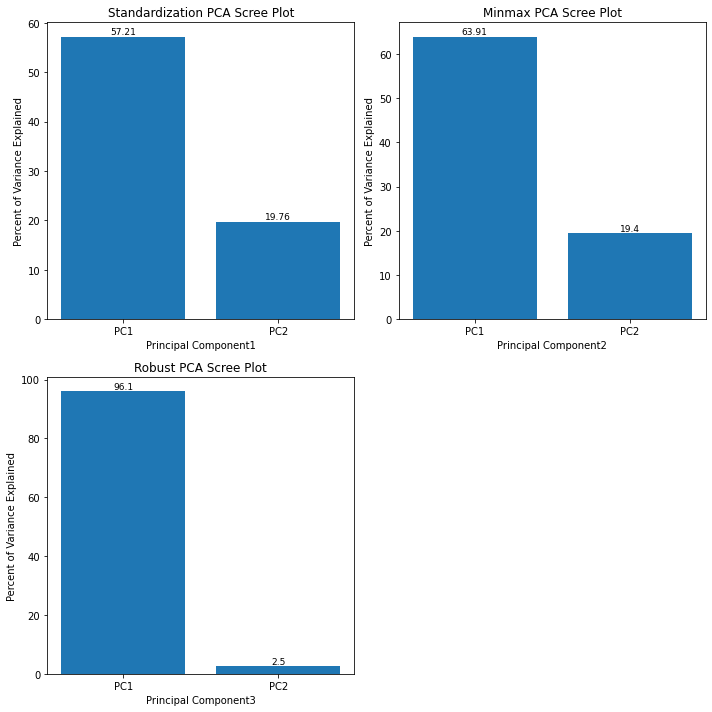

In [791]:
#PCA 모든 설명력 그래프로 표기
chart_column = ['PC'+str(d) for d in range(1, component +1)]
bar_chart = plt.figure(figsize=(10,10))
scale_num = list(range(1,5))

for name, scale_num_idx in zip(scaler_name, scale_num): 
    globals()['ax{}'.format(scale_num_idx)] = bar_chart.add_subplot(2,2,scale_num_idx)
    globals()['ax{}'.format(scale_num_idx)].bar(chart_column, height = globals()['{}_PCA_percent_variance'.format(name)])
    globals()['ax{}'.format(scale_num_idx)].set_ylabel('Percent of Variance Explained', fontsize = 10)
    globals()['ax{}'.format(scale_num_idx)].set_xlabel('Principal Component{}'.format(scale_num_idx), fontsize = 10)
    globals()['ax{}'.format(scale_num_idx)].set_title('{} PCA Scree Plot'.format(name), fontsize = 12)
    for j, v in enumerate(chart_column):  # 차트에 수치 표시
            plt.text(v, globals()['{}_PCA_percent_variance'.format(name)][j], globals()['{}_PCA_percent_variance'.format(name)][j], fontsize = 9, horizontalalignment = 'center', verticalalignment = 'bottom')
plt.tight_layout()
plt.show()

In [792]:
# Standardization_PCA, Minmax_PCA, Robust_PCA
Standardization_PCA

PC1       PC2
0   -1.923895  0.216598
1   -1.050916  0.673637
2   -1.194115  0.560066
3   -1.447947 -0.074671
4   -1.276341  0.849503
..        ...       ...
253  5.247729 -1.820132
254  5.972797 -2.276933
255 -2.324051  1.070794
256 -1.637176  0.172459
257 -2.401690  0.753918

[258 rows x 2 columns]

In [793]:
# 학습 모델(scaler 변경(Standardization_PCA, Minmax_PCA, Robust_PCA))
IF_PCA = IsolationForest(random_state = 42, contamination = 0.1, n_estimators = 100, max_samples = 50, n_jobs = -1, max_features=component)
Standardization_PCA_temp = Standardization_PCA.copy()
print(Standardization_PCA_temp)
IF_PCA.fit(Standardization_PCA_temp)
score = IF_PCA.decision_function(Standardization_PCA_temp)
Standardization_PCA['IF_PCA_Outliers'] = pd.Series(IF_PCA.predict(Standardization_PCA_temp)).apply(lambda x: 1 if x == -1 else 0)
Standardization_PCA['IF_PCA_score'] = score
Standardization_PCA['shot_no'] = multi_shot
PCA_outlier = Standardization_PCA.query('IF_PCA_Outliers == 1')
PCA_outlier

          PC1       PC2
0   -1.923895  0.216598
1   -1.050916  0.673637
2   -1.194115  0.560066
3   -1.447947 -0.074671
4   -1.276341  0.849503
..        ...       ...
253  5.247729 -1.820132
254  5.972797 -2.276933
255 -2.324051  1.070794
256 -1.637176  0.172459
257 -2.401690  0.753918

[258 rows x 2 columns]


PC1       PC2  IF_PCA_Outliers  IF_PCA_score  shot_no
11   0.222685  3.839982                1     -0.038668       12
12  -0.170666  4.330029                1     -0.045360       13
73   3.651245  2.945381                1     -0.000035       74
76   5.300002  2.616218                1     -0.016240       77
77   4.987890  2.181758                1     -0.017372       78
78   4.689333  2.878444                1     -0.006763       79
79   5.880455  2.617756                1     -0.031794       80
80   5.986562 -1.881373                1     -0.045425       81
81   5.876973 -2.333403                1     -0.068622       82
82   6.043585 -2.152150                1     -0.067062       83
97  -0.099905  3.617819                1     -0.021850       98
98  -0.899664  6.361933                1     -0.070152       99
161  4.104005  1.760260                1     -0.009431      162
162  4.992602  3.377456                1     -0.028998      163
164  5.059240  2.153618                1     -0.018001      165
165  5.223532  2.775505                1     -0.018033      166
166  6.075224 -1.208935                1     -0.021488      167
168  6.231023 -2.684512                1     -0.076141      169
183  0.029614  4.184333                1     -0.045360      184
184 -0.778308  5.809113                1     -0.073801      185
248  5.156658  2.837281                1     -0.012188      249
250  4.712041  2.960184                1     -0.010485      251
251  5.370342  3.315730                1     -0.037860      252
252  5.867768 -1.745387                1     -0.040191      253
253  5.247729 -1.820132                1     -0.024762      254
254  5.972797 -2.276933                1     -0.071347      255

In [794]:
print("Number of outliers detected: {}".format(len(PCA_outlier)))
print("Number of normal samples detected: {}".format(len(Minmax_PCA)))

Number of outliers detected: 26
Number of normal samples detected: 258


In [795]:
# Standardization_PCA, Minmax_PCA, Robust_PCA
Standardization_PCA

PC1       PC2  IF_PCA_Outliers  IF_PCA_score  shot_no
0   -1.923895  0.216598                0      0.182600        1
1   -1.050916  0.673637                0      0.156186        2
2   -1.194115  0.560066                0      0.181120        3
3   -1.447947 -0.074671                0      0.214370        4
4   -1.276341  0.849503                0      0.133296        5
..        ...       ...              ...           ...      ...
253  5.247729 -1.820132                1     -0.024762      254
254  5.972797 -2.276933                1     -0.071347      255
255 -2.324051  1.070794                0      0.080150      256
256 -1.637176  0.172459                0      0.204947      257
257 -2.401690  0.753918                0      0.107750      258

[258 rows x 5 columns]

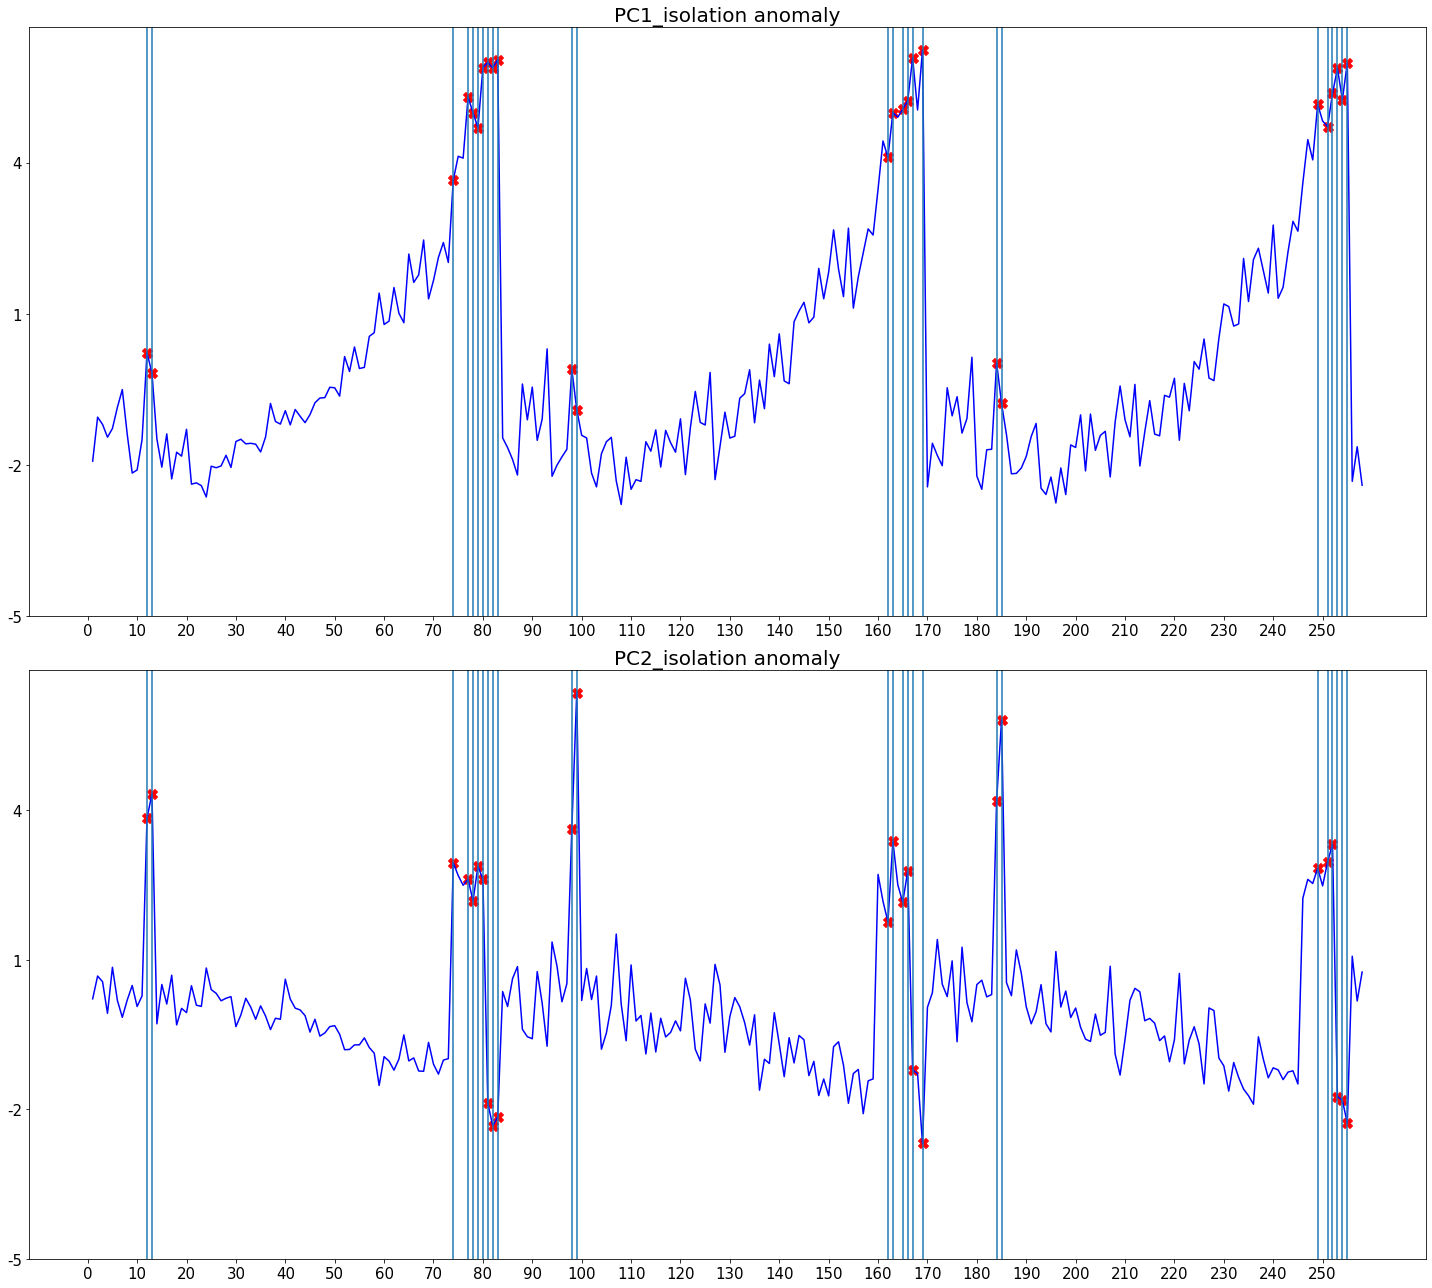

In [796]:
# Train 데이터 시각화(scaler 변경(Standardization_PCA, Minmax_PCA, Robust_PCA))
fig = plt.figure(figsize = (20,18))
temp_PCA = list(Standardization_PCA.columns[:component])

for PCA_idx in range(0, len(temp_PCA)):
    locals()['ax_()'.format(PCA_idx)] = fig.add_subplot(len(temp_PCA), 1, PCA_idx+1)
    locals()['ax_()'.format(PCA_idx)].plot(Standardization_PCA['shot_no'], Standardization_PCA[temp_PCA[PCA_idx]], color = 'blue')
    locals()['ax_()'.format(PCA_idx)].scatter(PCA_outlier['shot_no'], PCA_outlier[temp_PCA[PCA_idx]], color = 'red', s= 100, marker = 'X')
    for axv_idx in range(len(PCA_outlier['shot_no'].values)):
        locals()['ax_()'.format(axv_idx)].axvline(x  = PCA_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(PCA_idx)].set_title('{}_isolation anomaly'.format(temp_PCA[PCA_idx]), fontsize = 20)
    locals()['ax_()'.format(PCA_idx)].set_xticks(np.arange(0, 260, 10))
    locals()['ax_()'.format(PCA_idx)].set_xticklabels(np.arange(0, 260, 10), fontsize = 15)
    locals()['ax_()'.format(PCA_idx)].set_yticks(np.arange(-5, 5, 3))
    locals()['ax_()'.format(PCA_idx)].set_yticklabels(np.arange(-5, 5, 3), fontsize = 15)
fig.tight_layout()

In [797]:
test_multi_data_scaling

current_spindle  current_x  current_z       rpm    load_1  servo_load_x  \
0          -0.277599   0.265201   1.328121 -0.109422 -0.103726      0.394638   
1           0.042279   1.445433   1.669368 -0.132502 -0.012704      0.513232   
2          -0.300024  -0.809808  -0.162856 -0.115784 -0.128651     -0.116590   
3          -0.097003   0.583308   1.088260 -0.079544 -0.081005      0.745619   
4          -0.148395   0.534492   0.533905 -0.092542 -0.097652      0.664393   
..               ...        ...        ...       ...       ...           ...   
725        -0.345506  -0.540598   0.043275 -0.127837 -0.148554     -1.007336   
726        -0.202545  -0.864423   0.433499 -0.100069 -0.093320     -0.672323   
727        -0.267970   0.091082   0.476550 -0.113470 -0.110757     -0.874937   
728        -0.419755  -0.507701  -0.639833 -0.087395 -0.140768     -0.737307   
729        -0.390200  -0.974672   0.020914 -0.095341 -0.161002     -0.979916   

     servo_load_z  servo_current_x  servo_current_z  IF_score  \
0        0.202817         0.426214        -0.218910  0.126422   
1        0.319676         0.588930        -0.332910  0.093366   
2        0.324468        -0.215951        -0.344019  0.160869   
3        0.238688         0.566538        -0.254771  0.105560   
4        0.312203         0.574980        -0.327393  0.123070   
..            ...              ...              ...       ...   
725     -0.112031        -1.091810         0.179078  0.132284   
726     -0.136348        -1.196722         0.182176  0.116713   
727     -0.254419        -0.990945         0.387398  0.122494   
728      0.070709        -0.783670         0.002650  0.147558   
729     -0.162606        -0.819301         0.364304  0.126511   

     IF_multi_Outliers  shot_no  
0                    0     5926  
1                    0     5927  
2                    0     5928  
3                    0     5929  
4                    0     5930  
..                 ...      ...  
725                  0     6797  
726                  0     6798  
727                  0     6799  
728                  0     6800  
729                  0     6801  

[730 rows x 12 columns]

In [798]:
test_multi_data_scaling.iloc[:, :-3]

current_spindle  current_x  current_z       rpm    load_1  servo_load_x  \
0          -0.277599   0.265201   1.328121 -0.109422 -0.103726      0.394638   
1           0.042279   1.445433   1.669368 -0.132502 -0.012704      0.513232   
2          -0.300024  -0.809808  -0.162856 -0.115784 -0.128651     -0.116590   
3          -0.097003   0.583308   1.088260 -0.079544 -0.081005      0.745619   
4          -0.148395   0.534492   0.533905 -0.092542 -0.097652      0.664393   
..               ...        ...        ...       ...       ...           ...   
725        -0.345506  -0.540598   0.043275 -0.127837 -0.148554     -1.007336   
726        -0.202545  -0.864423   0.433499 -0.100069 -0.093320     -0.672323   
727        -0.267970   0.091082   0.476550 -0.113470 -0.110757     -0.874937   
728        -0.419755  -0.507701  -0.639833 -0.087395 -0.140768     -0.737307   
729        -0.390200  -0.974672   0.020914 -0.095341 -0.161002     -0.979916   

     servo_load_z  servo_current_x  servo_current_z  
0        0.202817         0.426214        -0.218910  
1        0.319676         0.588930        -0.332910  
2        0.324468        -0.215951        -0.344019  
3        0.238688         0.566538        -0.254771  
4        0.312203         0.574980        -0.327393  
..            ...              ...              ...  
725     -0.112031        -1.091810         0.179078  
726     -0.136348        -1.196722         0.182176  
727     -0.254419        -0.990945         0.387398  
728      0.070709        -0.783670         0.002650  
729     -0.162606        -0.819301         0.364304  

[730 rows x 9 columns]

In [799]:
# 테스트셋 적용(앞의 scaling 값 적용)
test_set_PCA = test_multi_data_scaling.iloc[:, :-3].copy()
test_set_PCA = pd.DataFrame(pca.fit_transform(test_set_PCA), columns = ['PC'+str(i) for i in range(1, component+1)])
print(test_set_PCA)
test_set_PCA_temp = test_set_PCA.copy()
test_set_PCA['IF_PCA_score'] = pd.Series(IF_PCA.decision_function(test_set_PCA_temp))
test_set_PCA['IF_PCA_Outliers'] = pd.Series(IF_PCA.predict(test_set_PCA_temp)).apply(lambda x: 1 if x == -1 else 0)
test_set_PCA['shot_no'] = test_multi_shot_no
test_PCA_outlier = test_set_PCA.query('IF_PCA_Outliers == 1')
test_PCA_outlier

          PC1       PC2
0   -0.525459  0.169733
1   -0.492149  0.958815
2    0.323217 -0.659254
3   -0.473892  0.707232
4   -0.242726  0.763671
..        ...       ...
725  0.172072 -1.530983
726  0.074426 -1.632636
727 -0.157253 -1.155064
728  0.377403 -1.053713
729  0.013772 -1.608233

[730 rows x 2 columns]


PC1       PC2  IF_PCA_score  IF_PCA_Outliers  shot_no
117  -1.020044  3.462460     -0.005776                1     6134
118  -1.509754  3.560407     -0.004516                1     6135
120  -1.519285  3.444765     -0.000830                1     6137
121  -1.311728  3.734063     -0.016119                1     6138
123  -1.436655  3.909718     -0.021085                1     6140
124  -1.403783  3.642078     -0.007809                1     6141
125  -1.421808  3.549119     -0.000704                1     6142
126  -1.208201  3.601125     -0.003818                1     6143
127  -1.263734  4.099451     -0.027504                1     6145
128  -1.392311  4.050974     -0.024256                1     6146
129  -1.214937  3.973051     -0.026227                1     6147
130  -1.346411  4.445048     -0.030236                1     6148
131  -1.412090  4.666508     -0.032731                1     6149
132  -0.999120  4.255853     -0.034291                1     6150
133  -1.359081  4.734713     -0.033452                1     6151
134  -1.199052  4.297756     -0.028580                1     6152
135  -1.043881  4.205090     -0.034291                1     6153
136  -1.050235  3.738576     -0.020512                1     6154
137  -0.918941  4.332050     -0.036880                1     6155
138  -0.720598  3.287848     -0.001749                1     6156
139  -1.029551  3.830685     -0.028351                1     6157
140  -1.046239  3.920048     -0.027503                1     6158
142  -0.879607  3.751751     -0.021984                1     6160
143  -0.983939  3.496291     -0.005776                1     6161
144  -0.779101  3.890253     -0.033711                1     6162
146  -1.280282  3.677665     -0.012334                1     6164
147  -1.362255  3.776488     -0.016747                1     6165
148  -1.672993  4.456659     -0.035071                1     6166
186  30.219727  4.488813     -0.091555                1     6207
253  -0.322852  3.118913     -0.000471                1     6286
256  -0.834956  3.669385     -0.013046                1     6289
257  -0.440908  3.189277     -0.002511                1     6290
258  -0.423270  3.250541     -0.006826                1     6291
259  -0.572012  3.820188     -0.035596                1     6292
263  -0.546091  3.303819     -0.006826                1     6296
265  -2.095608  3.317315     -0.005535                1     6298
266  -2.366145  3.514031     -0.024222                1     6299
267  -2.377733  3.855233     -0.049355                1     6300
268  -2.647918  4.854504     -0.072043                1     6301
269  -2.863339  4.542920     -0.077531                1     6302
270  -2.814168  4.066045     -0.070878                1     6303
271  -2.659659  5.930848     -0.085165                1     6304
272  -1.899338  6.828845     -0.063086                1     6305
273  -2.228587  6.457512     -0.066856                1     6306
274  -2.272973  6.718324     -0.068213                1     6307
587  32.175168  8.105449     -0.110932                1     6646
590  29.890938  3.668384     -0.067782                1     6649
591  22.308472 -1.265990     -0.021281                1     6650

In [800]:
# Test-set normal 데이터와 이상치 데이터
print("---PCA test set 적용 결과---")
print("Number of outliers detected: {}".format(len(test_PCA_outlier)))
print("Number of normal samples detected: {}".format(len(test_set_PCA)))

---PCA test set 적용 결과---
Number of outliers detected: 48
Number of normal samples detected: 730


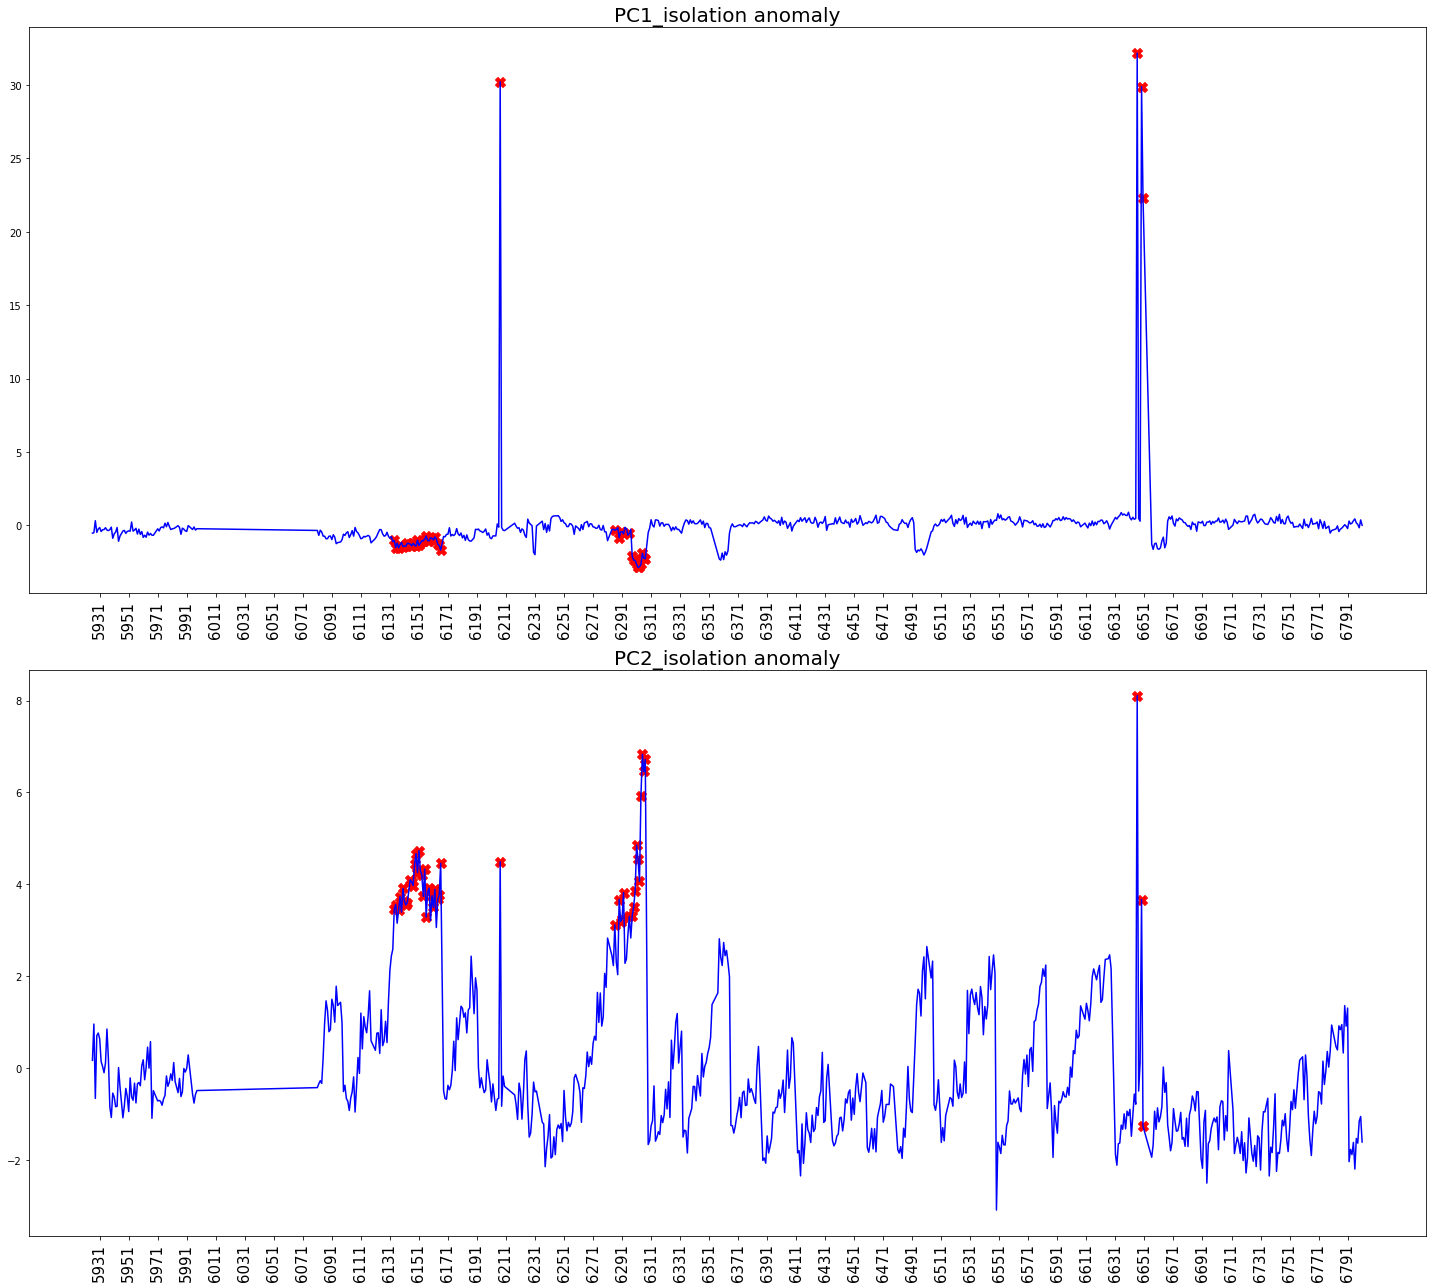

In [801]:
# 테스트 셋 시각화
fig_PCA_test = plt.figure(figsize = (20,18))
temp_test_PCA_graph = list(test_set_PCA_temp.columns)

for fig_PCA_test_idx in range(0, len(temp_test_PCA_graph)):
    locals()['ax_()'.format(fig_PCA_test_idx)] = fig_PCA_test.add_subplot(len(temp_test_PCA_graph), 1, fig_PCA_test_idx+1)
    locals()['ax_()'.format(fig_PCA_test_idx)].plot(test_set_PCA['shot_no'], test_set_PCA[temp_test_PCA_graph[fig_PCA_test_idx]], color = 'blue')
    locals()['ax_()'.format(fig_PCA_test_idx)].scatter(test_PCA_outlier['shot_no'], test_PCA_outlier[temp_test_PCA_graph[fig_PCA_test_idx]], color = 'red', s= 100, marker = 'X')
#    for axv_idx in range(len(test_PCA_outlier['shot_no'].values)):
#        locals()['ax_()'.format(axv_idx)].axvline(x  = test_PCA_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_PCA_test_idx)].set_title('{}_isolation anomaly'.format(temp_test_PCA_graph[fig_PCA_test_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_PCA_test_idx)].set_xticks(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20))
    locals()['ax_()'.format(fig_PCA_test_idx)].set_xticklabels(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig_PCA_test_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig_PCA_test_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig_PCA_test.tight_layout()

# (2) SVM 기반 - One-class SVM

# (2-1) Current spindle

In [802]:
# Training-set 기반 모델 수립
from sklearn.svm import OneClassSVM

#SVM 모델 구축
SVM_model = OneClassSVM(nu=0.09, kernel = 'rbf', gamma = 0.000001) # gamma는 hyper plane 구성 시 참조하는 데이터의 거리, gamma가 클수록 주변 데이터를 Support vector로 판단
# nu는 Hyperplane 밖에 있는 데이터의 최대 비율 ex) nu = 0.1일 경우 최대 10%정도를 전체 데이터 중 비정상이라고 가정하고 hyperplane을 나눔
SVM_model.fit(df_mod2[['current_spindle']])
df_mod2['SVM_anomaly'] = pd.Series(SVM_model.predict(df_mod2[['current_spindle']]), index = df_mod2[['current_spindle']].index)
df_mod2['SVM_anomaly'] = df_mod2['SVM_anomaly'].map({1:0, -1:1})
df_mod2['SVM_anomaly'].value_counts()

0    235
1     23
Name: SVM_anomaly, dtype: int64

In [803]:
len(SVM_model.support_vectors_)

24

In [804]:
df_mod2

shot_no  current_spindle  current_x   current_z         rpm     load_1  \
0          1      2866.130850  14.417383  100.264565  298.681948   8.914995   
1          2      2953.241517  16.679641  104.192615  298.527944   9.518962   
2          3      2932.554134  16.325787  106.010827  298.289370   9.125000   
3          4      2917.411314  13.908917   98.685523  298.633749   9.267498   
4          5      2941.406250  16.968750  107.514648  298.320312   9.196289   
..       ...              ...        ...         ...         ...        ...   
253      254      3287.876140  26.754559   83.215805  297.459726  11.950524   
254      255      3283.111274  27.046120   86.144217  297.827233  12.021165   
255      256      2942.512968  12.349664  108.358309  297.559078   9.001163   
256      257      2911.725989  14.645480  101.612053  297.645951   9.108921   
257      258      2932.051068  14.655525   96.939647  297.851439   9.395608   

     servo_load_x  servo_load_z  servo_current_x  servo_current_z  \
0        7.803247     57.022923         7.237822       -57.025788   
1        8.080838     57.232535         7.612774       -57.233533   
2        8.235236     56.946850         7.397638       -56.953740   
3        7.789070     56.744008         7.232982       -56.746884   
4        8.028320     57.135742         7.387695       -57.132812   
..            ...           ...              ...              ...   
253     11.461378     56.311446        10.833934       -56.073704   
254     11.564804     55.197501        11.463728       -55.704677   
255      7.576360     57.746280         6.416427       -56.760165   
256      7.662980     56.879382         7.152071       -56.760846   
257      7.337550     57.882626         6.722460       -58.096050   

     IF_Outliers  IF_score  SVM_anomaly  
0              0  0.028386            1  
1              0  0.195295            0  
2              0  0.212058            0  
3              0  0.192845            0  
4              0  0.208306            0  
..           ...       ...          ...  
253            1 -0.040220            0  
254            1 -0.033042            0  
255            0  0.206408            0  
256            0  0.173894            0  
257            0  0.211924            0  

[258 rows x 13 columns]

23


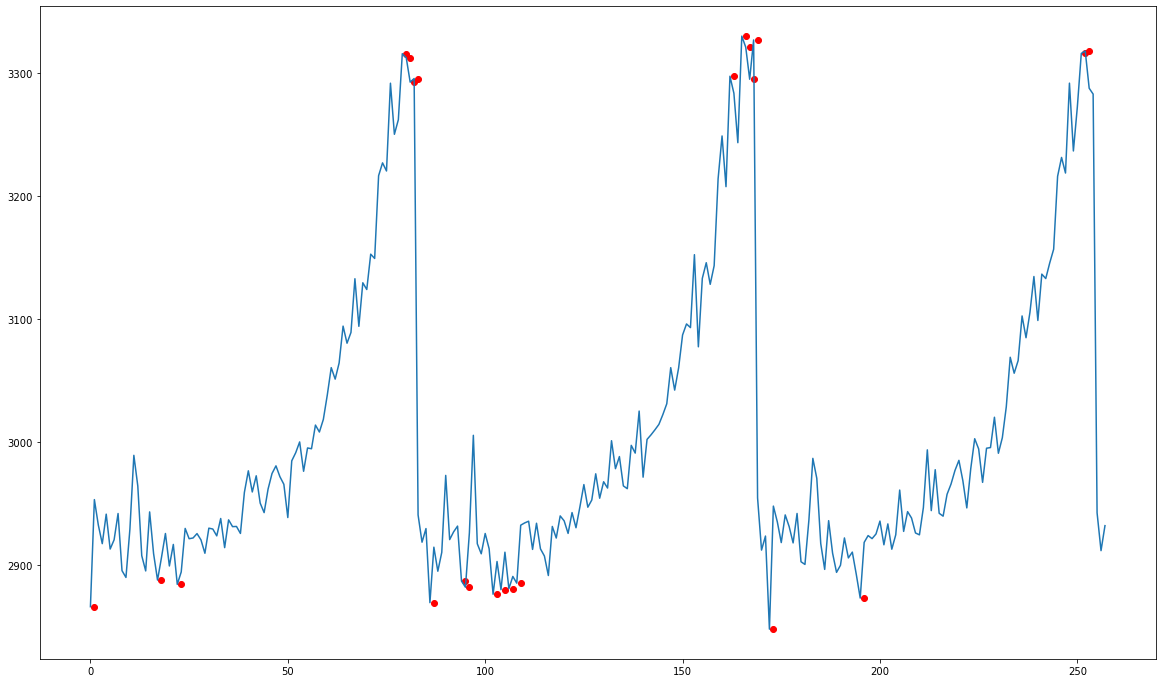

In [805]:
a = df_mod2.query('SVM_anomaly == 1')
print(len(a))
a.reset_index(inplace = True)

plt.figure(figsize = (20,12))
plt.plot(df_mod2['current_spindle'])
plt.scatter(a['shot_no'], a['current_spindle'], color = 'red')

In [806]:
df_mod2

shot_no  current_spindle  current_x   current_z         rpm     load_1  \
0          1      2866.130850  14.417383  100.264565  298.681948   8.914995   
1          2      2953.241517  16.679641  104.192615  298.527944   9.518962   
2          3      2932.554134  16.325787  106.010827  298.289370   9.125000   
3          4      2917.411314  13.908917   98.685523  298.633749   9.267498   
4          5      2941.406250  16.968750  107.514648  298.320312   9.196289   
..       ...              ...        ...         ...         ...        ...   
253      254      3287.876140  26.754559   83.215805  297.459726  11.950524   
254      255      3283.111274  27.046120   86.144217  297.827233  12.021165   
255      256      2942.512968  12.349664  108.358309  297.559078   9.001163   
256      257      2911.725989  14.645480  101.612053  297.645951   9.108921   
257      258      2932.051068  14.655525   96.939647  297.851439   9.395608   

     servo_load_x  servo_load_z  servo_current_x  servo_current_z  \
0        7.803247     57.022923         7.237822       -57.025788   
1        8.080838     57.232535         7.612774       -57.233533   
2        8.235236     56.946850         7.397638       -56.953740   
3        7.789070     56.744008         7.232982       -56.746884   
4        8.028320     57.135742         7.387695       -57.132812   
..            ...           ...              ...              ...   
253     11.461378     56.311446        10.833934       -56.073704   
254     11.564804     55.197501        11.463728       -55.704677   
255      7.576360     57.746280         6.416427       -56.760165   
256      7.662980     56.879382         7.152071       -56.760846   
257      7.337550     57.882626         6.722460       -58.096050   

     IF_Outliers  IF_score  SVM_anomaly  
0              0  0.028386            1  
1              0  0.195295            0  
2              0  0.212058            0  
3              0  0.192845            0  
4              0  0.208306            0  
..           ...       ...          ...  
253            1 -0.040220            0  
254            1 -0.033042            0  
255            0  0.206408            0  
256            0  0.173894            0  
257            0  0.211924            0  

[258 rows x 13 columns]

In [807]:
test_data_result

shot_no  current_spindle  current_x   current_z         rpm    load_1  \
0       5926      2925.809430  17.679764  110.058939  298.513752  9.326130   
1       5927      2999.691843  21.485398  113.310171  298.282981  9.965760   
2       5928      2920.630009  14.213420   95.853681  298.450140  9.150979   
3       5929      2967.521780  18.705492  107.773674  298.812500  9.485795   
4       5930      2955.651727  18.548086  102.492063  298.682540  9.368814   
..       ...              ...        ...         ...         ...       ...   
725     6797      2910.125000  15.081481   97.817593  298.329630  9.011111   
726     6798      2943.144590  14.037313  101.535448  298.607276  9.399254   
727     6799      2928.033397  17.118321  101.945611  298.473282  9.276718   
728     6800      2892.975654  15.187556   91.309288  298.733995  9.065825   
729     6801      2899.801818  13.681818   97.604545  298.654545  8.923636   

     servo_load_x  servo_load_z  servo_current_x  servo_current_z  \
0        8.559921     57.356582         7.960707       -57.356582   
1        8.660624     57.481370         8.100705       -57.478348   
2        8.125815     57.486486         7.408201       -57.490214   
3        8.857955     57.394886         8.081439       -57.394886   
4        8.788982     57.473389         8.088702       -57.472456   
..            ...           ...              ...              ...   
725      7.369444     57.020370         6.654630       -56.931481   
726      7.653918     56.994403         6.564366       -56.928172   
727      7.481870     56.868321         6.741412       -56.708969   
728      7.598738     57.215509         6.919748       -57.119928   
729      7.392727     56.966364         6.889091       -56.733636   

     Spindle_IF_Outliers  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
725                    0  
726                    0  
727                    0  
728                    0  
729                    0  

[730 rows x 11 columns]

In [808]:
# test set 적용
SVM_test = test_data_result.copy()
# SVM_test[['shot_no','current_spindle','current_x','current_z', 'rpm', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z']]
SVM_test = SVM_test[['current_spindle']]
test_data_result['SVM_anomaly'] = pd.Series(SVM_model.predict(SVM_test), index = SVM_test.index)
test_data_result['SVM_anomaly'] = test_data_result['SVM_anomaly'].map({1:0, -1:1})
test_data_result['SVM_anomaly'].value_counts()

0    710
1     20
Name: SVM_anomaly, dtype: int64

In [809]:
test_data_result

shot_no  current_spindle  current_x   current_z         rpm    load_1  \
0       5926      2925.809430  17.679764  110.058939  298.513752  9.326130   
1       5927      2999.691843  21.485398  113.310171  298.282981  9.965760   
2       5928      2920.630009  14.213420   95.853681  298.450140  9.150979   
3       5929      2967.521780  18.705492  107.773674  298.812500  9.485795   
4       5930      2955.651727  18.548086  102.492063  298.682540  9.368814   
..       ...              ...        ...         ...         ...       ...   
725     6797      2910.125000  15.081481   97.817593  298.329630  9.011111   
726     6798      2943.144590  14.037313  101.535448  298.607276  9.399254   
727     6799      2928.033397  17.118321  101.945611  298.473282  9.276718   
728     6800      2892.975654  15.187556   91.309288  298.733995  9.065825   
729     6801      2899.801818  13.681818   97.604545  298.654545  8.923636   

     servo_load_x  servo_load_z  servo_current_x  servo_current_z  \
0        8.559921     57.356582         7.960707       -57.356582   
1        8.660624     57.481370         8.100705       -57.478348   
2        8.125815     57.486486         7.408201       -57.490214   
3        8.857955     57.394886         8.081439       -57.394886   
4        8.788982     57.473389         8.088702       -57.472456   
..            ...           ...              ...              ...   
725      7.369444     57.020370         6.654630       -56.931481   
726      7.653918     56.994403         6.564366       -56.928172   
727      7.481870     56.868321         6.741412       -56.708969   
728      7.598738     57.215509         6.919748       -57.119928   
729      7.392727     56.966364         6.889091       -56.733636   

     Spindle_IF_Outliers  SVM_anomaly  
0                      0            0  
1                      0            0  
2                      0            0  
3                      0            0  
4                      0            0  
..                   ...          ...  
725                    0            0  
726                    0            0  
727                    0            0  
728                    0            0  
729                    0            0  

[730 rows x 12 columns]

In [810]:
test_data_result.query('SVM_anomaly == 1')

shot_no  current_spindle  current_x   current_z         rpm      load_1  \
18      5944      2885.155251  15.295890   94.822831  298.845662    8.967123   
20      5947      2882.405248  13.057337   96.194363  298.552964    9.085520   
40      5967      2868.810427  13.872986  100.704265  298.680569    8.744076   
41      5968      2882.864734  14.282126   99.915942  298.182609    8.893720   
43      5972      2879.055291  14.434700  102.053384  298.406101    8.942803   
48      5977      2884.828887  15.092916   95.788408  298.689052    8.896044   
50      5979      2880.856348  14.216867   92.417053  298.470806    8.824838   
53      5982      2883.032403  15.602160   95.364536  298.663366    8.993699   
88      6103      2881.282173  14.168732  102.095329  298.934223    8.913251   
186     6207      5737.200000  15.000000   10.200000  209.400000  116.200000   
192     6219      2866.130850  14.417383  100.264565  298.681948    8.914995   
209     6239      2887.796209  13.612322   99.143128  298.456872    8.981991   
214     6244      2884.306940  14.047153   92.339858  298.739324    8.956406   
271     6304      3315.960766  33.237226  108.109489  328.912409   12.183394   
272     6305      3312.663381  28.850644   86.120546  298.604246   12.102350   
273     6306      3292.811550  26.219605   85.379939  298.670213   11.853343   
274     6307      3295.770132  28.031479   86.852123  298.550512   11.923133   
587     6646      6987.000000  37.250000   11.000000  178.000000  118.500000   
590     6649      5602.200000  18.200000   10.200000  189.600000  119.200000   
591     6650      5308.866667   3.400000    8.666667  222.200000   38.000000   

     servo_load_x  servo_load_z  servo_current_x  servo_current_z  \
18       8.526941     56.067580         7.852055       -56.063927   
20       7.854227     56.594752         7.407191       -56.594752   
40       8.007583     56.498578         7.246445       -56.496682   
41       8.333333     56.645411         7.710145       -56.647343   
43       8.172545     57.027645         7.578646       -57.031459   
48       8.390984     57.284269         7.768169       -57.280589   
50       8.262280     57.121409         7.791474       -57.117702   
53       8.588659     57.216022         7.887489       -57.207921   
88       8.052431     56.410867         7.427073       -56.399428   
186      5.400000     72.200000         5.400000       -72.200000   
192      7.803247     57.022923         7.237822       -57.025788   
209      7.355450     56.281517         6.815166       -56.281517   
214      7.356762     57.441281         6.807829       -57.439502   
271     10.666971     56.631387        10.149635       -56.630474   
272     11.455648     55.673237        11.059136       -55.670205   
273     11.481003     55.259878        11.151216       -55.260638   
274     11.555637     55.295754        11.071742       -55.290630   
587      4.250000     70.250000         4.250000       -70.250000   
590      4.400000     70.400000         4.400000       -70.400000   
591      4.133333     68.400000         4.133333       -68.400000   

     Spindle_IF_Outliers  SVM_anomaly  
18                     0            1  
20                     0            1  
40                     0            1  
41                     0            1  
43                     0            1  
48                     0            1  
50                     0            1  
53                     0            1  
88                     0            1  
186                    1            1  
192                    0            1  
209                    0            1  
214                    0            1  
271                    1            1  
272                    1            1  
273                    1            1  
274                    1            1  
587                    1            1  
590                    1            1  
591                    1            1

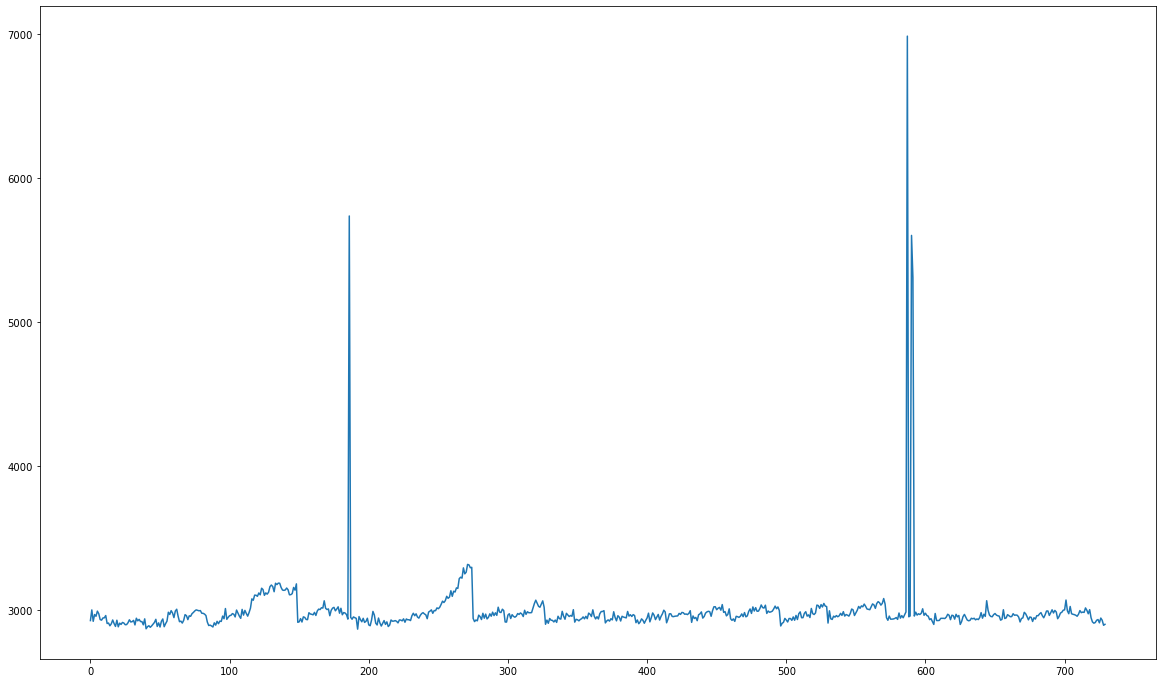

In [811]:
plt.figure(figsize = (20,12))
plt.plot(test_data_result['current_spindle'])

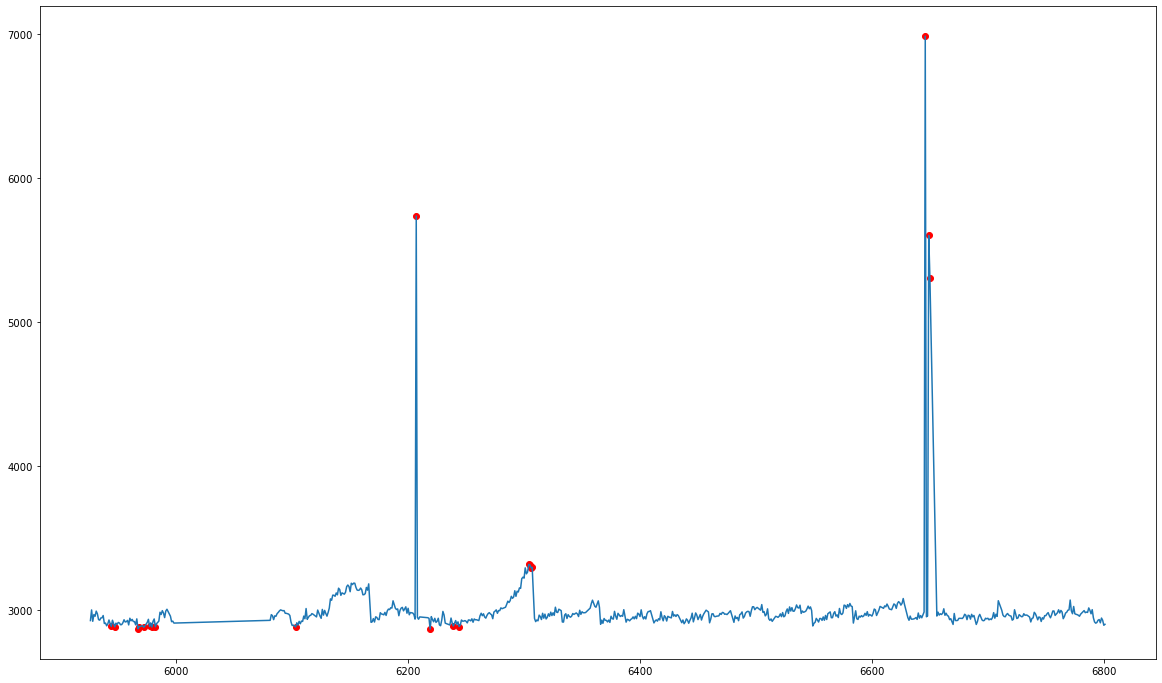

In [812]:
a_test = test_data_result.query('SVM_anomaly == 1')
a_test.reset_index(inplace = True)

plt.figure(figsize = (20,12))
plt.plot(test_data_result['shot_no'], test_data_result['current_spindle'])
plt.scatter(a_test['shot_no'], a_test['current_spindle'], color = 'red')

In [813]:
sts_data.iloc[:, :-3]

current_spindle  current_x  current_z       rpm    load_1  servo_load_x  \
0          -1.154511  -0.718033   0.476742 -0.308455 -1.020835     -0.705178   
1          -0.417591  -0.258524   0.879777 -0.325220 -0.344329     -0.445018   
2          -0.592598  -0.330398   1.066333 -0.351192 -0.785607     -0.300315   
3          -0.720700  -0.821313   0.314725 -0.313702 -0.625995     -0.718465   
4          -0.517713  -0.199800   1.220632 -0.347824 -0.705756     -0.494238   
..               ...        ...        ...       ...       ...           ...   
253         2.413275   1.787894  -1.272536 -0.441510  2.379277      2.723245   
254         2.372966   1.847116  -0.972068 -0.401502  2.458402      2.820177   
255        -0.508350  -1.138029   1.307195 -0.430694 -0.924318     -0.917818   
256        -0.768795  -0.671702   0.615000 -0.421237 -0.803618     -0.836638   
257        -0.596854  -0.669662   0.135591 -0.398867 -0.482499     -1.141633   

     servo_load_z  servo_current_x  servo_current_z  
0        0.218543        -0.640236        -0.128316  
1        0.521649        -0.320579        -0.438108  
2        0.108540        -0.503989        -0.020877  
3       -0.184777        -0.644363         0.287590  
4        0.381683        -0.512465        -0.287912  
..            ...              ...              ...  
253     -0.810273         2.425546         1.291446  
254     -2.421072         2.962463         1.841745  
255      1.264540        -1.340497         0.267785  
256      0.010978        -0.713341         0.266769  
257      1.461700        -1.079596        -1.724306  

[258 rows x 9 columns]

# (2-2) Scaling data 기반의 전체 Feature 모델 수립

In [814]:
# 학습 모델 (scaler 변경)
SVM_multi_model = OneClassSVM(nu=0.08, kernel = 'rbf', gamma = 0.001)
SVM_multi_model.fit(sts_data.iloc[:, :-3])
result['Overall_SVM_anomaly'] = pd.Series(SVM_multi_model.predict(sts_data.iloc[:, :-3]), index = sts_data.iloc[:, :-3].index)
result['Overall_SVM_anomaly'] = result['Overall_SVM_anomaly'].map({1:0, -1:1})
print(result['Overall_SVM_anomaly'].value_counts())
multi_SVM_outlier = result.query('Overall_SVM_anomaly==1')
multi_SVM_outlier

0    238
1     20
Name: Overall_SVM_anomaly, dtype: int64


current_spindle  current_x  current_z       rpm    load_1  servo_load_x  \
12         -0.324079   0.384233   3.178962  2.969033 -0.369843     -0.394048   
79          2.650859   3.104654   1.281665  2.982528  2.640115      1.978722   
80          2.622964   2.213651  -0.974497 -0.316914  2.549337      2.717875   
81          2.455026   1.679234  -1.050486 -0.309732  2.270424      2.741638   
82          2.480055   2.047262  -0.899433 -0.322763  2.348595      2.811586   
93         -0.599820  -0.481099   0.584684 -0.446157 -0.315068     -0.697642   
98         -0.721319   0.967898   4.682223  2.909081 -0.423249     -0.491357   
107        -0.946332  -1.220855   0.408247 -0.432483 -1.232636     -1.565915   
111        -0.566223  -1.075377  -0.997304 -0.261458 -0.455286     -1.167309   
166         2.695797   2.742471  -0.266378 -0.379723  2.158955      2.686609   
168         2.745726   2.028526  -1.631335 -0.412659  2.458402      2.820177   
169        -0.406291  -1.768852  -0.220831 -0.250510 -0.924318     -0.917818   
179        -0.513009  -0.601514  -0.547829 -0.568298 -0.315068     -0.697642   
184        -0.271348   0.675290   3.849639  2.972950 -0.423249     -0.491357   
193        -0.778917  -1.070085  -0.347391 -0.287298 -1.232636     -1.565915   
195        -1.095266  -0.719572   1.255340 -0.378363 -1.330126     -1.094190   
197        -0.665164  -1.454807  -0.082235 -0.371019 -0.455286     -1.167309   
251         2.652850   3.336314   2.056909  2.876943  2.041861      1.933736   
252         2.669681   2.186702  -0.941747 -0.362143  2.158955      2.686609   
254         2.372966   1.847116  -0.972068 -0.401502  2.458402      2.820177   

     servo_load_z  servo_current_x  servo_current_z  IF_Outliers  IF_score  \
12       0.578048        -0.552922        -0.475267            0  0.038839   
79      -0.347630         1.842163         0.461182            1 -0.057131   
80      -1.733143         2.617537         1.893151            1 -0.065046   
81      -2.330873         2.696038         2.503902            1 -0.080048   
82      -2.278996         2.628284         2.459179            1 -0.084005   
93       2.867823        -1.063252        -1.094557            0  0.103399   
98       3.048082        -0.293580        -1.778968            1 -0.025659   
107     -0.454395        -1.255392        -0.815097            0  0.068815   
111      0.704098        -0.241186        -3.207129            0  0.102249   
166     -0.553016         2.447434         3.472571            1 -0.072326   
168     -2.421072         2.962463         1.841745            1 -0.102578   
169      1.264540        -1.340497         0.267785            0  0.097858   
179      2.867823        -1.063252        -1.094557            0  0.087283   
184      3.048082        -0.293580        -1.778968            1 -0.028025   
193     -0.454395        -1.255392        -0.815097            0  0.076246   
195      0.881907        -1.127856        -0.991581            0  0.090611   
197      0.704098        -0.241186        -3.207129            0  0.115579   
251     -0.270380         1.819230        -0.690107            1 -0.055403   
252     -0.553016         2.447434         3.472571            1 -0.062374   
254     -2.421072         2.962463         1.841745            1 -0.085667   

     shot_no  Overall_SVM_anomaly  
12        13                    1  
79        80                    1  
80        81                    1  
81        82                    1  
82        83                    1  
93        94                    1  
98        99                    1  
107      108                    1  
111      112                    1  
166      167                    1  
168      169                    1  
169      170                    1  
179      180                    1  
184      185                    1  
193      194                    1  
195      196                    1  
197      198                    1  
251      252                    1  
2

In [815]:
SVM_multi_model.support_

array([ 12,  79,  80,  81,  82,  93,  98, 107, 111, 162, 166, 168, 169,
       175, 179, 184, 193, 195, 197, 251, 252, 254])

In [816]:
SVM_multi_model.support_vectors_[:, 0]

array([-0.32407918,  2.65085878,  2.62296431,  2.45502628,  2.48005462,
       -0.59981966, -0.72131936, -0.94633219, -0.56622321,  2.49585273,
        2.69579746,  2.74572611, -0.40629101, -0.71325393, -0.51300851,
       -0.27134753, -0.77891667, -1.0952657 , -0.66516378,  2.65285018,
        2.66968117,  2.37296608])

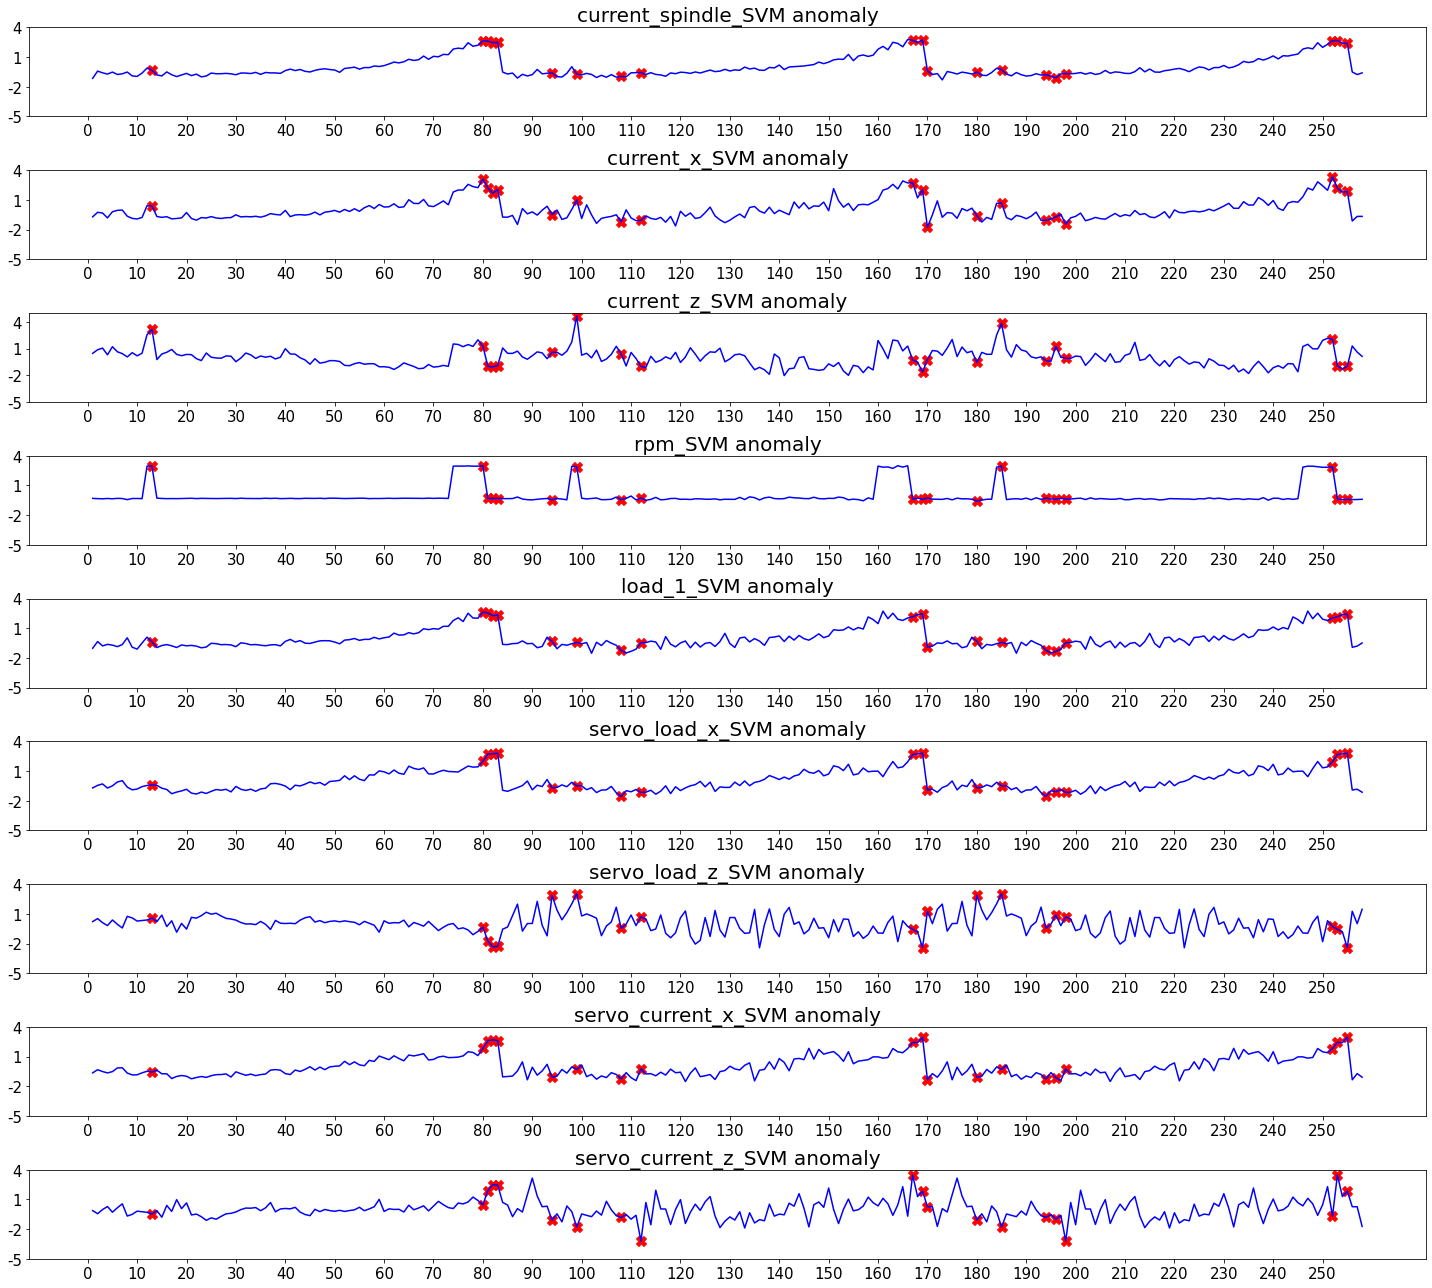

In [817]:
# Oneclass SVM Train 데이터 시각화
fig6 = plt.figure(figsize = (20,18))
temp_graph = list(parameter.columns)

for fig6_idx in range(0, len(temp_graph)):
    locals()['ax_()'.format(fig6_idx)] = fig6.add_subplot(len(temp_graph), 1, fig6_idx+1)
    locals()['ax_()'.format(fig6_idx)].plot(result['shot_no'], result[temp_graph[fig6_idx]], color = 'blue')
    locals()['ax_()'.format(fig6_idx)].scatter(multi_SVM_outlier['shot_no'], multi_SVM_outlier[temp_graph[fig6_idx]], color = 'red', s= 100, marker = 'X')
#     for axv_idx in range(len(multi_SVM_outlier['shot_no'].values)):
#         locals()['ax_()'.format(axv_idx)].axvline(x  = multi_SVM_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig6_idx)].set_title('{}_SVM anomaly'.format(temp_graph[fig6_idx]), fontsize = 20)
    locals()['ax_()'.format(fig6_idx)].set_xticks(np.arange(0, 260, 10))
    locals()['ax_()'.format(fig6_idx)].set_xticklabels(np.arange(0, 260, 10), fontsize = 15)
    locals()['ax_()'.format(fig6_idx)].set_yticks(np.arange(-5, 5, 3))
    locals()['ax_()'.format(fig6_idx)].set_yticklabels(np.arange(-5, 5, 3), fontsize = 15)
fig6.tight_layout()

In [818]:
# Oneclass SVM 테스트셋 적용(앞의 scaling 값 적용)

# 테스트셋 적용(scaler 변경(모델) standard, standard, robust)
print(scaling_temp) # test set scaling 데이터
test_multi_data_scaling['SVM_multi_Outliers'] = pd.Series(SVM_multi_model.predict(scaling_temp)).apply(lambda x: 1 if x == -1 else 0)
test_SVM_multi_outlier = test_multi_data_scaling.query('SVM_multi_Outliers == 1')
test_SVM_multi_outlier

     current_spindle  current_x  current_z       rpm    load_1  servo_load_x  \
0          -0.277599   0.265201   1.328121 -0.109422 -0.103726      0.394638   
1           0.042279   1.445433   1.669368 -0.132502 -0.012704      0.513232   
2          -0.300024  -0.809808  -0.162856 -0.115784 -0.128651     -0.116590   
3          -0.097003   0.583308   1.088260 -0.079544 -0.081005      0.745619   
4          -0.148395   0.534492   0.533905 -0.092542 -0.097652      0.664393   
..               ...        ...        ...       ...       ...           ...   
725        -0.345506  -0.540598   0.043275 -0.127837 -0.148554     -1.007336   
726        -0.202545  -0.864423   0.433499 -0.100069 -0.093320     -0.672323   
727        -0.267970   0.091082   0.476550 -0.113470 -0.110757     -0.874937   
728        -0.419755  -0.507701  -0.639833 -0.087395 -0.140768     -0.737307   
729        -0.390200  -0.974672   0.020914 -0.095341 -0.161002     -0.979916   

     servo_load_z  servo_current_x  ser

current_spindle  current_x  current_z        rpm     load_1  \
186        11.894479  -0.565868  -9.153022  -9.021800  15.104885   
268         1.307713   4.276106   1.312113   2.924498   0.288005   
269         1.127774   3.928575   1.096966   2.900637   0.226094   
270         1.179065   3.758189   1.860503   2.902803   0.223830   
271         1.411584   5.090000   1.123507   2.930785   0.302875   
272         1.397308   3.729600  -1.184441  -0.100372   0.291342   
273         1.311358   2.913642  -1.262174  -0.093774   0.255908   
274         1.324167   3.475554  -1.107655  -0.105746   0.265839   
496        -0.440116  -1.643760   1.364978  -0.038114  -0.199419   
587        17.305560   6.334472  -9.069055 -12.162153  15.432184   
590        11.309989   0.426541  -9.153022 -11.002022  15.531797   
591        10.039985  -4.163348  -9.313960  -7.741656   3.976689   
592        -0.142092   0.005909   2.591572   2.924688  -0.078037   
593        -0.025078   0.660762   3.382280   2.878185  -0.049621   
595        -0.073621   0.622129   3.100657   2.873191  -0.054357   
597        -0.058000   1.253862   3.230444   2.879235  -0.051973   

     servo_load_x  servo_load_z  servo_current_x  servo_current_z  IF_score  \
186     -3.326666     14.103064        -2.550038       -14.115615 -0.076783   
268      2.280711     -0.656898         2.497871         0.641446 -0.050274   
269      2.146482     -0.968360         2.405828         0.951970 -0.057069   
270      2.181061     -0.752487         1.972931         0.734396 -0.039536   
271      2.876020     -0.476297         2.970355         0.460886 -0.058316   
272      3.804812     -1.373565         4.027447         1.359910 -0.040524   
273      3.834671     -1.760658         4.134470         1.743354 -0.051814   
274      3.922564     -1.727062         4.042100         1.715276 -0.044638   
496     -1.799154      0.221413        -1.480002        -0.335352  0.058024   
587     -4.680972     12.276970        -3.886657       -12.289986 -0.096097   
590     -4.504323     12.417438        -3.712315       -12.430419 -0.068984   
591     -4.818365     10.544521        -4.022256       -10.557979 -0.079294   
592     -1.100346      0.269640        -1.250916        -0.284677  0.029786   
593     -1.045148      0.178661        -1.145916        -0.110949 -0.004271   
595     -0.646022      0.765460        -0.991175        -0.634844 -0.002493   
597     -0.884241      0.248758        -1.015630        -0.212037 -0.002960   

     IF_multi_Outliers  shot_no  SVM_multi_Outliers  
186                  1     6207                   1  
268                  1     6301                   1  
269                  1     6302                   1  
270                  1     6303                   1  
271                  1     6304                   1  
272                  1     6305                   1  
273                  1     6306                   1  
274                  1     6307                   1  
496                  0     6549                   1  
587                  1     6646                   1  
590                  1     6649                   1  
591                  1     6650                   1  
592                  0     6656                   1  
593                  1     6657                   1  
595                  1     6659                   1  
597                  1     6661                   1

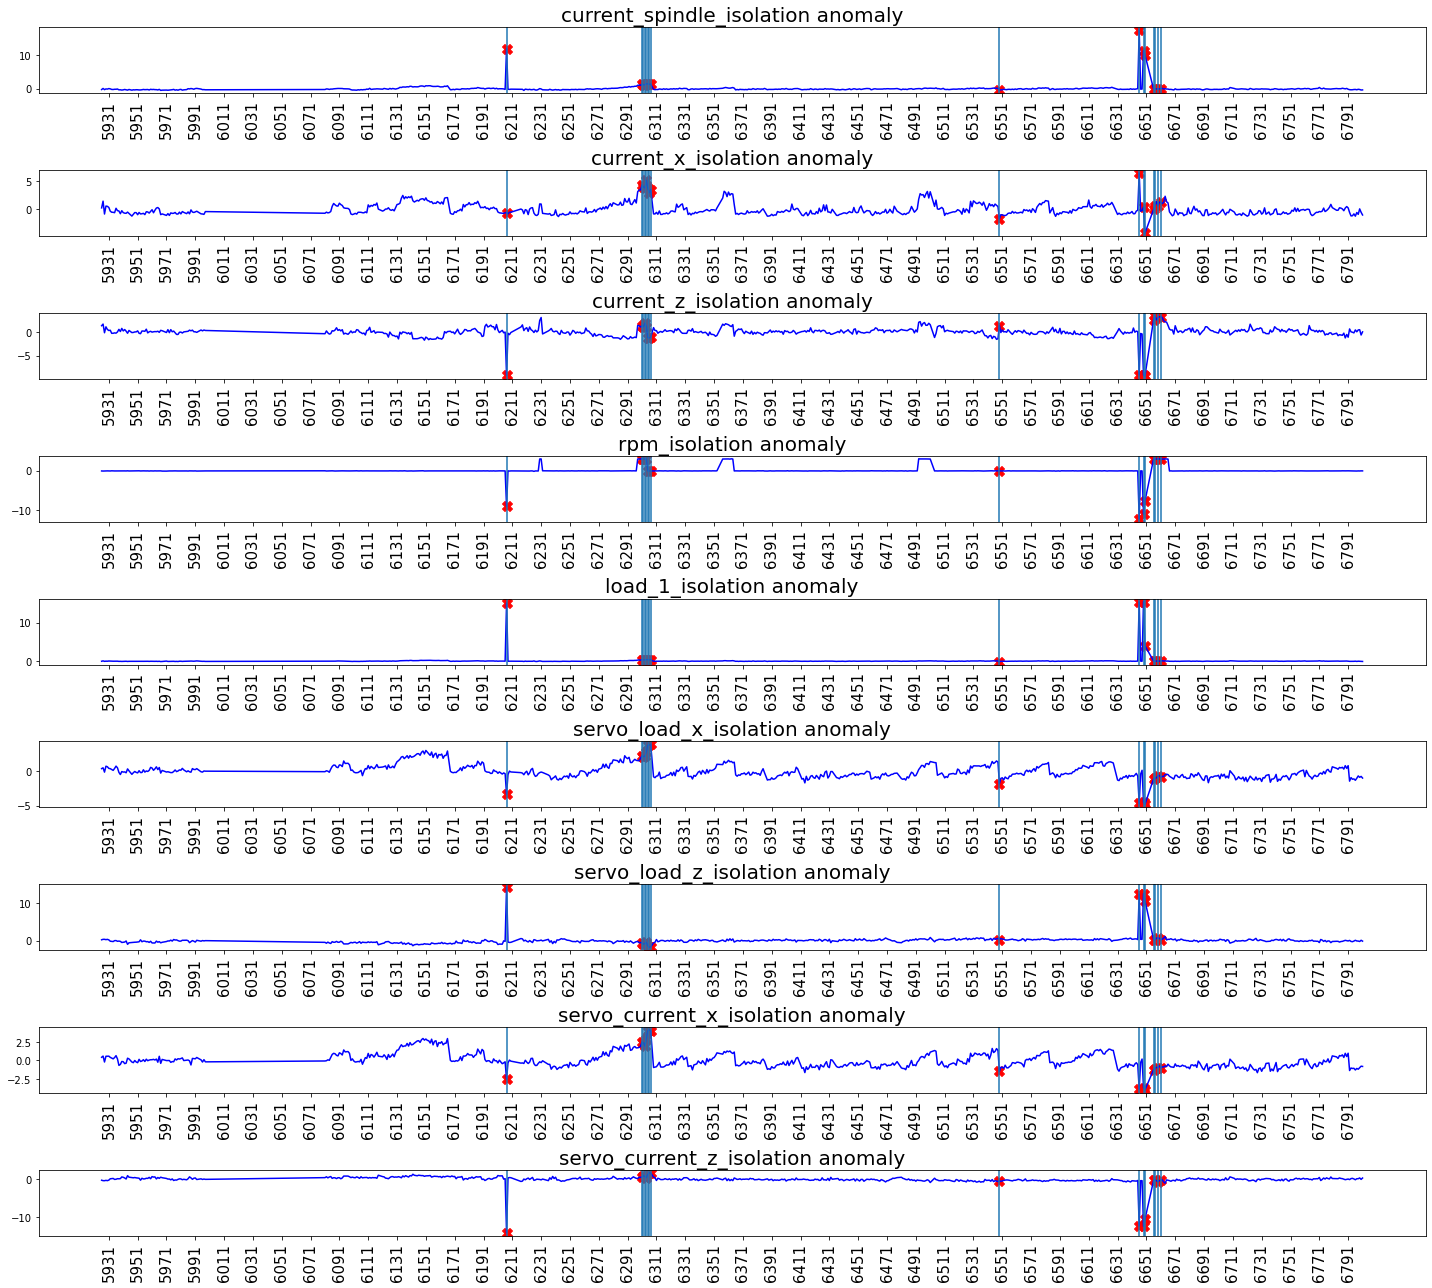

In [819]:
# Oneclass SVM 테스트 셋 시각화
fig_overall_SVM = plt.figure(figsize = (20,18))
temp_multi_graph = list(parameter.columns)

for fig_overall_SVM_idx in range(0, len(temp_multi_graph)):
    locals()['ax_()'.format(fig_overall_SVM_idx)] = fig_overall_SVM.add_subplot(len(temp_multi_graph), 1, fig_overall_SVM_idx+1)
    locals()['ax_()'.format(fig_overall_SVM_idx)].plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling[temp_multi_graph[fig_overall_SVM_idx]], color = 'blue')
    locals()['ax_()'.format(fig_overall_SVM_idx)].scatter(test_SVM_multi_outlier['shot_no'], test_SVM_multi_outlier[temp_multi_graph[fig_overall_SVM_idx]], color = 'red', s= 100, marker = 'X')
    for axv_idx in range(len(test_SVM_multi_outlier['shot_no'].values)):
         locals()['ax_()'.format(axv_idx)].axvline(x  = test_SVM_multi_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_overall_SVM_idx)].set_title('{}_isolation anomaly'.format(temp_multi_graph[fig_overall_SVM_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_overall_SVM_idx)].set_xticks(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20))
    locals()['ax_()'.format(fig_overall_SVM_idx)].set_xticklabels(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig_overall_SVM_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig_overall_SVM_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig_overall_SVM.tight_layout()

# (2-3) PCA-Oneclass SVM

# (1) 전체 Feature 차원축소

In [820]:
Standardization_PCA.iloc[:, :-3]

PC1       PC2
0   -1.923895  0.216598
1   -1.050916  0.673637
2   -1.194115  0.560066
3   -1.447947 -0.074671
4   -1.276341  0.849503
..        ...       ...
253  5.247729 -1.820132
254  5.972797 -2.276933
255 -2.324051  1.070794
256 -1.637176  0.172459
257 -2.401690  0.753918

[258 rows x 2 columns]

In [821]:
# 학습 모델(scaler 변경(Standardization_PCA, Standardization_PCA, Robust_PCA))
SVM_PCA = OneClassSVM(nu=0.08, kernel = 'rbf', gamma = 0.001)
Standardization_PCA_temp = Standardization_PCA.iloc[:,:-3].copy()
print(Standardization_PCA_temp)
SVM_PCA.fit(Standardization_PCA_temp)
Standardization_PCA['SVM_PCA_Outliers'] = pd.Series(SVM_PCA.predict(Standardization_PCA_temp)).apply(lambda x: 1 if x == -1 else 0)
SVM_PCA_outlier = Standardization_PCA.query('SVM_PCA_Outliers == 1')
SVM_PCA_outlier

          PC1       PC2
0   -1.923895  0.216598
1   -1.050916  0.673637
2   -1.194115  0.560066
3   -1.447947 -0.074671
4   -1.276341  0.849503
..        ...       ...
253  5.247729 -1.820132
254  5.972797 -2.276933
255 -2.324051  1.070794
256 -1.637176  0.172459
257 -2.401690  0.753918

[258 rows x 2 columns]


PC1       PC2  IF_PCA_Outliers  IF_PCA_score  shot_no  \
23  -2.635466  0.834289                0      0.069450       24   
79   5.880455  2.617756                1     -0.031794       80   
80   5.986562 -1.881373                1     -0.045425       81   
81   5.876973 -2.333403                1     -0.068622       82   
82   6.043585 -2.152150                1     -0.067062       83   
98  -0.899664  6.361933                1     -0.070152       99   
107 -2.783413  0.111784                0      0.109472      108   
109 -2.482208  0.896184                0      0.080959      110   
162  4.992602  3.377456                1     -0.028998      163   
166  6.075224 -1.208935                1     -0.021488      167   
168  6.231023 -2.684512                1     -0.076141      169   
169 -2.434366  0.046859                0      0.134364      170   
180 -2.481833  0.589646                0      0.113537      181   
184 -0.778308  5.809113                1     -0.073801      185   
192 -2.461616  0.500294                0      0.122228      193   
193 -2.584871 -0.282598                0      0.104943      194   
195 -2.753519  1.165269                0      0.030504      196   
197 -2.586553  0.372339                0      0.110549      198   
251  5.370342  3.315730                1     -0.037860      252   
252  5.867768 -1.745387                1     -0.040191      253   
253  5.247729 -1.820132                1     -0.024762      254   
254  5.972797 -2.276933                1     -0.071347      255   

     SVM_PCA_Outliers  
23                  1  
79                  1  
80                  1  
81                  1  
82                  1  
98                  1  
107                 1  
109                 1  
162                 1  
166                 1  
168                 1  
169                 1  
180                 1  
184                 1  
192                 1  
193                 1  
195                 1  
197                 1  
251                 1  
252                 1  
253                 1  
254                 1

In [822]:
test_set_PCA_temp

PC1       PC2
0   -0.525459  0.169733
1   -0.492149  0.958815
2    0.323217 -0.659254
3   -0.473892  0.707232
4   -0.242726  0.763671
..        ...       ...
725  0.172072 -1.530983
726  0.074426 -1.632636
727 -0.157253 -1.155064
728  0.377403 -1.053713
729  0.013772 -1.608233

[730 rows x 2 columns]

In [824]:
# 테스트셋 적용(앞의 scaling 값 적용)
test_set_PCA['SVM_PCA_Outliers'] = pd.Series(SVM_PCA.predict(test_set_PCA_temp)).apply(lambda x: 1 if x == -1 else 0)
test_set_PCA['SVM_PCA_hyperplane'] = pd.Series(SVM_PCA.decision_function(test_set_PCA_temp))
test_SVM_PCA_outlier = test_set_PCA.query('SVM_PCA_Outliers == 1')
test_SVM_PCA_outlier

PC1       PC2  IF_PCA_score  IF_PCA_Outliers  shot_no  \
118  -1.509754  3.560407     -0.004516                1     6135   
120  -1.519285  3.444765     -0.000830                1     6137   
121  -1.311728  3.734063     -0.016119                1     6138   
123  -1.436655  3.909718     -0.021085                1     6140   
124  -1.403783  3.642078     -0.007809                1     6141   
125  -1.421808  3.549119     -0.000704                1     6142   
126  -1.208201  3.601125     -0.003818                1     6143   
127  -1.263734  4.099451     -0.027504                1     6145   
128  -1.392311  4.050974     -0.024256                1     6146   
129  -1.214937  3.973051     -0.026227                1     6147   
130  -1.346411  4.445048     -0.030236                1     6148   
131  -1.412090  4.666508     -0.032731                1     6149   
132  -0.999120  4.255853     -0.034291                1     6150   
133  -1.359081  4.734713     -0.033452                1     6151   
134  -1.199052  4.297756     -0.028580                1     6152   
135  -1.043881  4.205090     -0.034291                1     6153   
137  -0.918941  4.332050     -0.036880                1     6155   
139  -1.029551  3.830685     -0.028351                1     6157   
140  -1.046239  3.920048     -0.027503                1     6158   
146  -1.280282  3.677665     -0.012334                1     6164   
147  -1.362255  3.776488     -0.016747                1     6165   
148  -1.672993  4.456659     -0.035071                1     6166   
186  30.219727  4.488813     -0.091555                1     6207   
265  -2.095608  3.317315     -0.005535                1     6298   
266  -2.366145  3.514031     -0.024222                1     6299   
267  -2.377733  3.855233     -0.049355                1     6300   
268  -2.647918  4.854504     -0.072043                1     6301   
269  -2.863339  4.542920     -0.077531                1     6302   
270  -2.814168  4.066045     -0.070878                1     6303   
271  -2.659659  5.930848     -0.085165                1     6304   
272  -1.899338  6.828845     -0.063086                1     6305   
273  -2.228587  6.457512     -0.066856                1     6306   
274  -2.272973  6.718324     -0.068213                1     6307   
319  -2.286704  2.815532      0.003204                0     6358   
320  -2.362980  2.412187      0.014870                0     6359   
322  -2.328666  2.733949      0.002595                0     6361   
324  -2.022955  2.561700      0.028507                0     6363   
587  32.175168  8.105449     -0.110932                1     6646   
590  29.890938  3.668384     -0.067782                1     6649   
591  22.308472 -1.265990     -0.021281                1     6650   

     SVM_PCA_Outliers  SVM_PCA_hyperplane  
118                 1           -0.031927  
120                 1           -0.020094  
121                 1           -0.028531  
123                 1           -0.065393  
124                 1           -0.028441  
125                 1           -0.019812  
126                 1           -0.000759  
127                 1           -0.069996  
128                 1           -0.078549  
129                 1           -0.047579  
130                 1           -0.128756  
131                 1           -0.170399  
132                 1           -0.062650  
133                 1           -0.174900  
134                 1           -0.090317  
135                 1           -0.060223  
137                 1           -0.065304  
139                 1           -0.008964  
140                 1           -0.022127  
146                 1           -0.018063  
147                 1           -0.039689  
148                 1           -0.170871  
186                 1          -10.760965  
265                 1           -0.084748  
266                 1           -0.147132  
267                 1           -0.189419  
268                 1           -0

In [826]:
SVM_PCA.intercept_

array([-19.82449763])

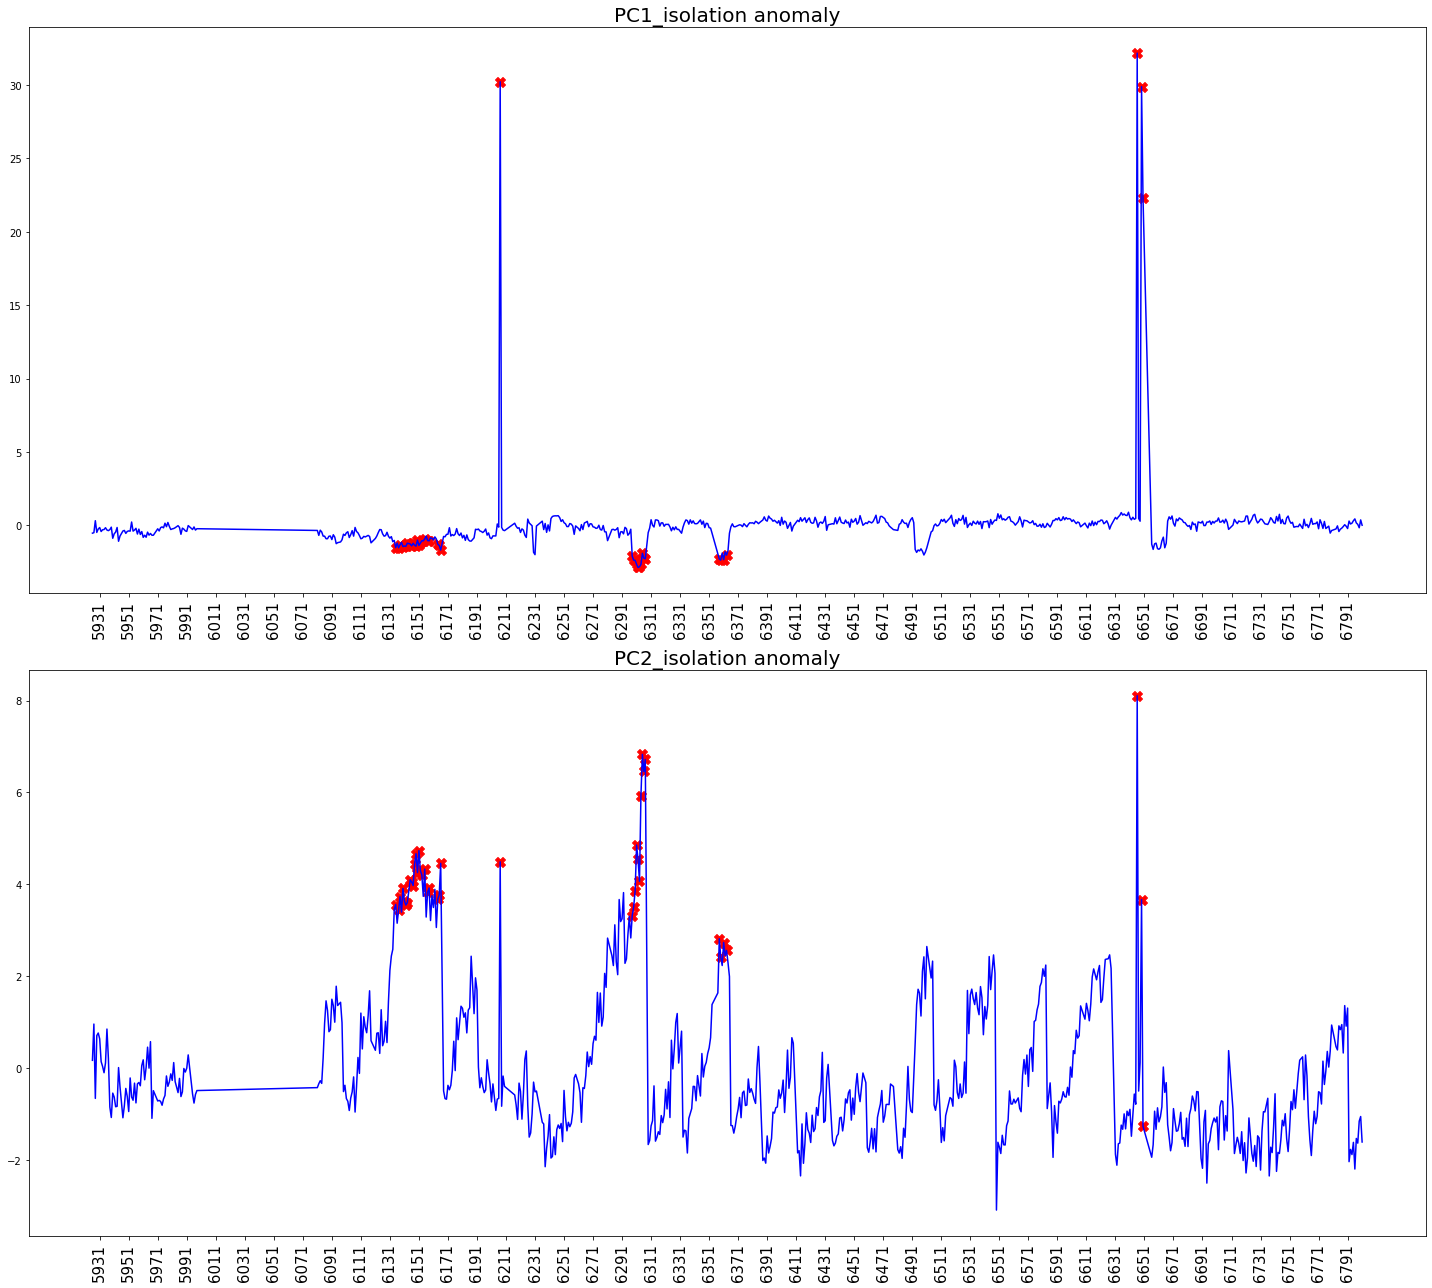

In [832]:
# Oneclass SVM 테스트 셋 시각화
fig_SVM_PCA_test = plt.figure(figsize = (20,18))
temp_test_SVM_PCA_graph = list(test_set_PCA_temp.columns)


for fig_SVM_PCA_test_idx in range(0, len(temp_test_SVM_PCA_graph)):
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)] = fig_SVM_PCA_test.add_subplot(len(temp_test_SVM_PCA_graph), 1, fig_SVM_PCA_test_idx+1)
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].plot(test_set_PCA['shot_no'], test_set_PCA[temp_test_SVM_PCA_graph[fig_SVM_PCA_test_idx]], color = 'blue')
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].scatter(test_SVM_PCA_outlier['shot_no'], test_SVM_PCA_outlier[temp_test_SVM_PCA_graph[fig_SVM_PCA_test_idx]], color = 'red', s= 100, marker = 'X')
    # locals()['ax_()'.format(fig6_idx)].contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
#    for axv_idx in range(len(test_SVM_PCA_outlier['shot_no'].values)):
#        locals()['ax_()'.format(axv_idx)].axvline(x  = test_SVM_PCA_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_title('{}_isolation anomaly'.format(temp_test_SVM_PCA_graph[fig_SVM_PCA_test_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_xticks(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20))
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_xticklabels(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig_SVM_PCA_test.tight_layout()

In [851]:
test_set_PCA

PC1       PC2  IF_PCA_score  IF_PCA_Outliers  shot_no  \
0   -0.525459  0.169733      0.181720                0     5926   
1   -0.492149  0.958815      0.099272                0     5927   
2    0.323217 -0.659254      0.172767                0     5928   
3   -0.473892  0.707232      0.127593                0     5929   
4   -0.242726  0.763671      0.110380                0     5930   
..        ...       ...           ...              ...      ...   
725  0.172072 -1.530983      0.100109                0     6797   
726  0.074426 -1.632636      0.070380                0     6798   
727 -0.157253 -1.155064      0.138334                0     6799   
728  0.377403 -1.053713      0.154471                0     6800   
729  0.013772 -1.608233      0.084565                0     6801   

     SVM_PCA_Outliers  SVM_PCA_hyperplane  
0                   0            0.239965  
1                   0            0.244416  
2                   0            0.273791  
3                   0            0.248212  
4                   0            0.267032  
..                ...                 ...  
725                 0            0.206043  
726                 0            0.190958  
727                 0            0.212366  
728                 0            0.253935  
729                 0            0.189013  

[730 rows x 7 columns]

In [850]:
SVM_PCA.support_

array([ 12,  23,  79,  80,  81,  82,  98, 107, 109, 162, 166, 168, 169,
       180, 184, 192, 193, 195, 197, 251, 252, 253, 254])

In [852]:
SVM_PCA.support_vectors_

array([[-0.17066638,  4.33002938],
       [-2.63546612,  0.83428939],
       [ 5.88045509,  2.61775564],
       [ 5.98656206, -1.88137294],
       [ 5.87697276, -2.33340295],
       [ 6.04358511, -2.15215022],
       [-0.89966425,  6.36193285],
       [-2.78341291,  0.11178364],
       [-2.48220808,  0.89618364],
       [ 4.99260201,  3.37745633],
       [ 6.0752237 , -1.20893459],
       [ 6.23102286, -2.68451176],
       [-2.43436595,  0.04685935],
       [-2.48183336,  0.58964599],
       [-0.77830763,  5.80911274],
       [-2.46161607,  0.50029406],
       [-2.58487055, -0.28259781],
       [-2.75351949,  1.16526921],
       [-2.58655258,  0.37233897],
       [ 5.37034183,  3.31573015],
       [ 5.86776828, -1.74538702],
       [ 5.24772887, -1.8201323 ],
       [ 5.97279667, -2.27693255]])

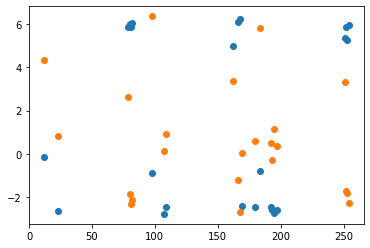

In [848]:
plt.scatter(SVM_PCA.support_, SVM_PCA.support_vectors_[:, 0])
plt.scatter(SVM_PCA.support_, SVM_PCA.support_vectors_[:, 1])